In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

# Data

In [5]:
# Read data
motion_07 = np.genfromtxt('../dataset2/motion_07.csv', delimiter=',')
print("Motion 0.7 data has a length of ", len(motion_07))

Motion 0.7 data has a length of  139762


## Visualizations

In [6]:
"""
    Plot a 4x2 grid of comparing data.
"""
def plot_non_overlapping_data(dataset, data:list, idxs: list):
    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4,2, figsize=(20,15))
    fig.suptitle('Heigh-Force (Idle)')

    ax1.plot(dataset[data[0], 0], dataset[data[0], idxs[0]], 'b-')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Height (FR)')

    ax2.plot(dataset[data[0], 0], dataset[data[0], idxs[1]], 'g-')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Force (FR)')

    ax3.plot(dataset[data[1], 0], dataset[data[1], idxs[2]], 'b-')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('Height (FL)')

    ax4.plot(dataset[data[1], 0], dataset[data[1], idxs[3]], 'g-')
    ax4.set_xlabel('Time')
    ax4.set_ylabel('Force (FL)')

    ax5.plot(dataset[data[2], 0], dataset[data[2], idxs[4]], 'b-')
    ax5.set_xlabel('Time')
    ax5.set_ylabel('Height (RR)')

    ax6.plot(dataset[data[2], 0], datasetD[data[2], idxs[5]], 'g-')
    ax6.set_xlabel('Time')
    ax6.set_ylabel('Force (RR)')

    ax7.plot(dataset[data[3], 0], dataset[data[3], idxs[6]], 'b-')
    ax7.set_xlabel('Time')
    ax7.set_ylabel('Height (RL)')

    ax8.plot(dataset[data[3], 0], dataset[data[3], idxs[7]], 'g-')
    ax8.set_xlabel('Time')
    ax8.set_ylabel('Force (RL)')

    fig.tight_layout()

    plt.show()
 
"""
    Plot data on overlapping graph. 
"""
def plot_overlapping_data(title: str, dataset, data: list, idxs: list, draw_footsteps=None, footsteps_timestamp=None):
    fig, (ax1, ax3, ax5, ax7) = plt.subplots(4,1, figsize=(20,15))
    fig.suptitle(title)
    
    # FR plot (height)
    ax1.plot(dataset[data[0], 0], dataset[data[0], idxs[0]], 'b-')
    ax1.set_ylabel('Height (FR)')
    ax1.set_xlabel('Time')
         
    # FR plot (force)
    ax2 = ax1.twinx()
    ax2.plot(dataset[data[0], 0], dataset[data[0], idxs[1]], 'g-')
    ax2.set_ylabel('Force (FR)', color='g')
          
    # FL plot (height)
    ax3.plot(dataset[data[1], 0], dataset[data[1], idxs[2]], 'b-')
    ax3.set_ylabel('Height (FL)')
    ax3.set_xlabel('Time')
         
    # FL plot (force)
    ax4 = ax3.twinx()
    ax4.plot(dataset[data[1], 0], dataset[data[1], idxs[3]], 'g-')
    ax4.set_ylabel('Force(FL)', color='g')      
          
    # RR plot (height)
    ax5.plot(dataset[data[2], 0], dataset[data[2], idxs[4]], 'b-')
    ax5.set_ylabel('Height (RR)')
    ax5.set_xlabel('Time')
         
    # RR plot (force)
    ax6 = ax5.twinx()
    ax6.plot(dataset[data[2], 0], dataset[data[2], idxs[5]], 'g-')
    ax6.set_ylabel('Force (RR)', color='g')   
          
    # RL plot (height)
    ax7.plot(dataset[data[3], 0], dataset[data[3], idxs[6]], 'b-')
    ax7.set_ylabel('Height (RL)')
    ax7.set_xlabel('Time')
         
    # RL plot (force)
    ax8 = ax7.twinx()
    ax8.plot(dataset[data[3], 0], dataset[data[3], idxs[7]], 'g-')
    ax8.set_ylabel('Force (RL)', color='g')

    for ax in [ax2, ax4, ax6, ax8]:
        for tl in ax.get_yticklabels():
            tl.set_color('g')
    
    # Draw footsteps
    if draw_footsteps:
        for ax in [ax1, ax3, ax5, ax7]:
            for footstep_timestamp in footsteps_timestamp:
                if footstep_timestamp <= max(dataset[data[0], 0]) and footstep_timestamp >= min(dataset[data[0], 0]):
                    #print("Timestamp: ", footstep_timestamp)
                    ax.axvline(x=footstep_timestamp, color='r', linestyle='-')
    
    fig.tight_layout()
    plt.show()

## Height-Force plots

In [7]:
"""
def get_specific_cmd(dataset, fwd, side, rot):
    return np.where(np.logical_and(dataset[:, 2] == fwd, 
                                   dataset[:, 3] == side, 
                                   dataset[:, 4] == rot))[0]
"""

def get_specific_cmd(dataset, fwd, side, rot):
    idxs = []
    for row_id, item in enumerate(dataset):
        if np.isclose(item[2], fwd, 0.01) and np.isclose(item[3], side, 0.01) and np.isclose(item[4], rot, 0.01):
            idxs.append(row_id)
    
    return idxs

In [8]:
def get_swinging_motions(dataset, height=-0.3):
    # FR min height (i.e swining motion)
    fr_min_height = np.where(dataset[:, 34] < height)[0]
    fl_min_height = np.where(dataset[:, 37] < height)[0]
    rr_min_height = np.where(dataset[:, 40] < height)[0]
    rl_min_height = np.where(dataset[:, 43] < height)[0]
            
    return fr_min_height,fl_min_height,rr_min_height,rl_min_height

## Motion_07

In [9]:
velocity = 0.725299

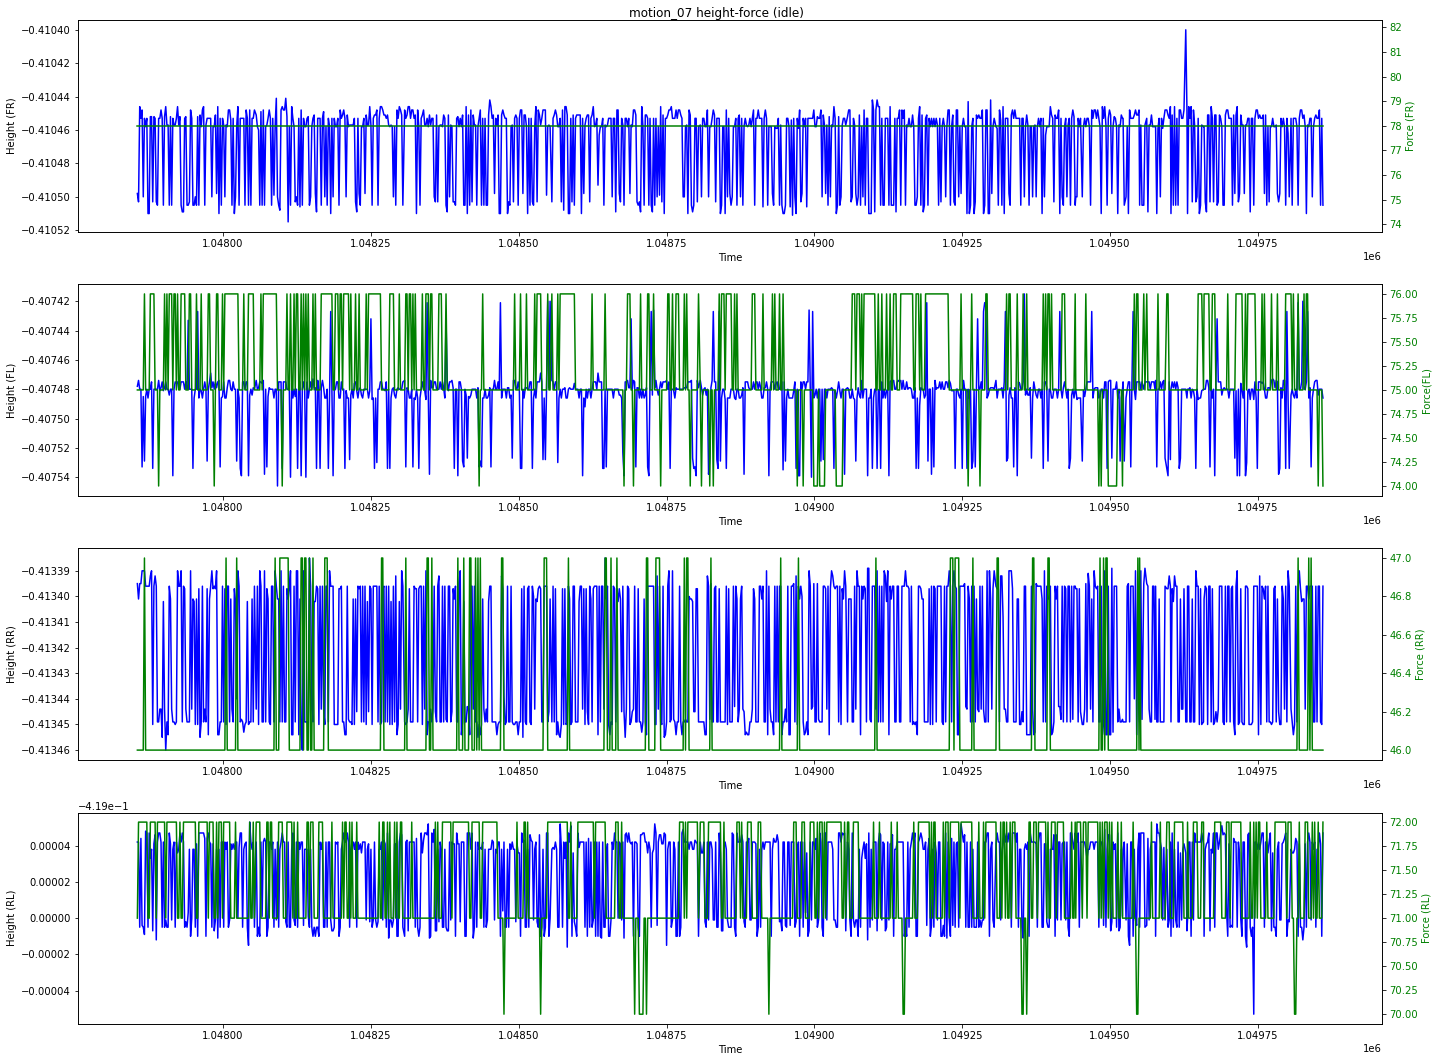

In [10]:
# Idle
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_07)

sample_walking_fr_height = fr_min_height[:1000]
sample_walking_fl_height = fl_min_height[:1000]
sample_walking_rr_height = rr_min_height[:1000]
sample_walking_rl_height = rl_min_height[:1000]

plot_overlapping_data("motion_07 height-force (idle)",
                      motion_07,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

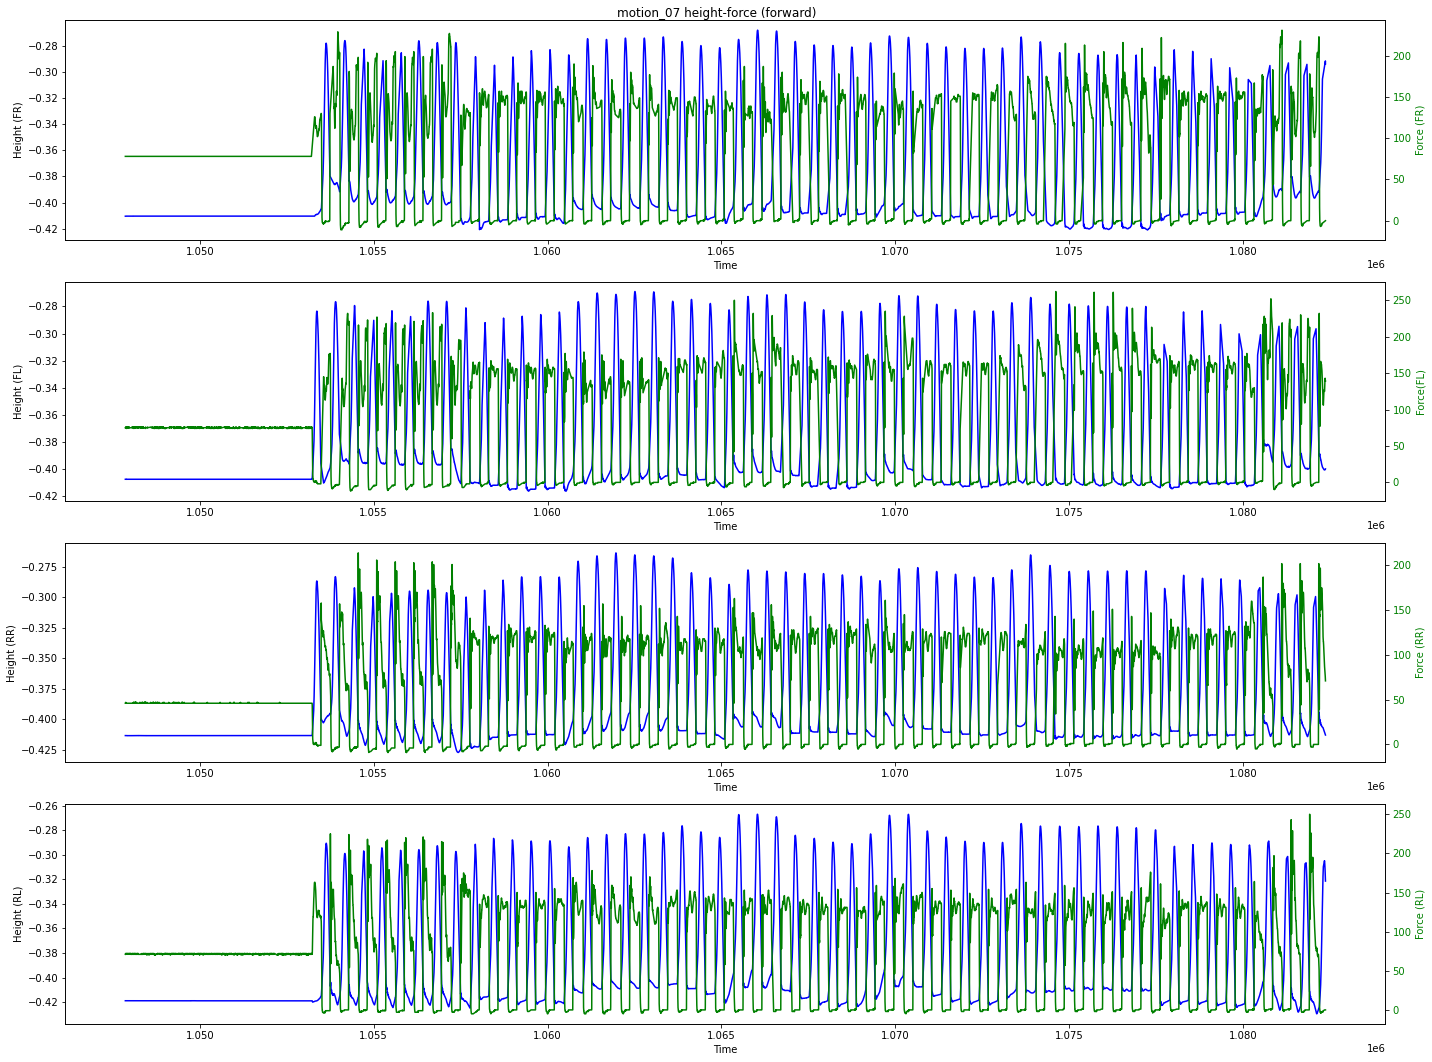

In [11]:
# Forward
fwd_cmds = get_specific_cmd(motion_07, velocity, 0, 0)
motion_07_fwd = motion_07[fwd_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_07_fwd)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_07 height-force (forward)",
                      motion_07,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

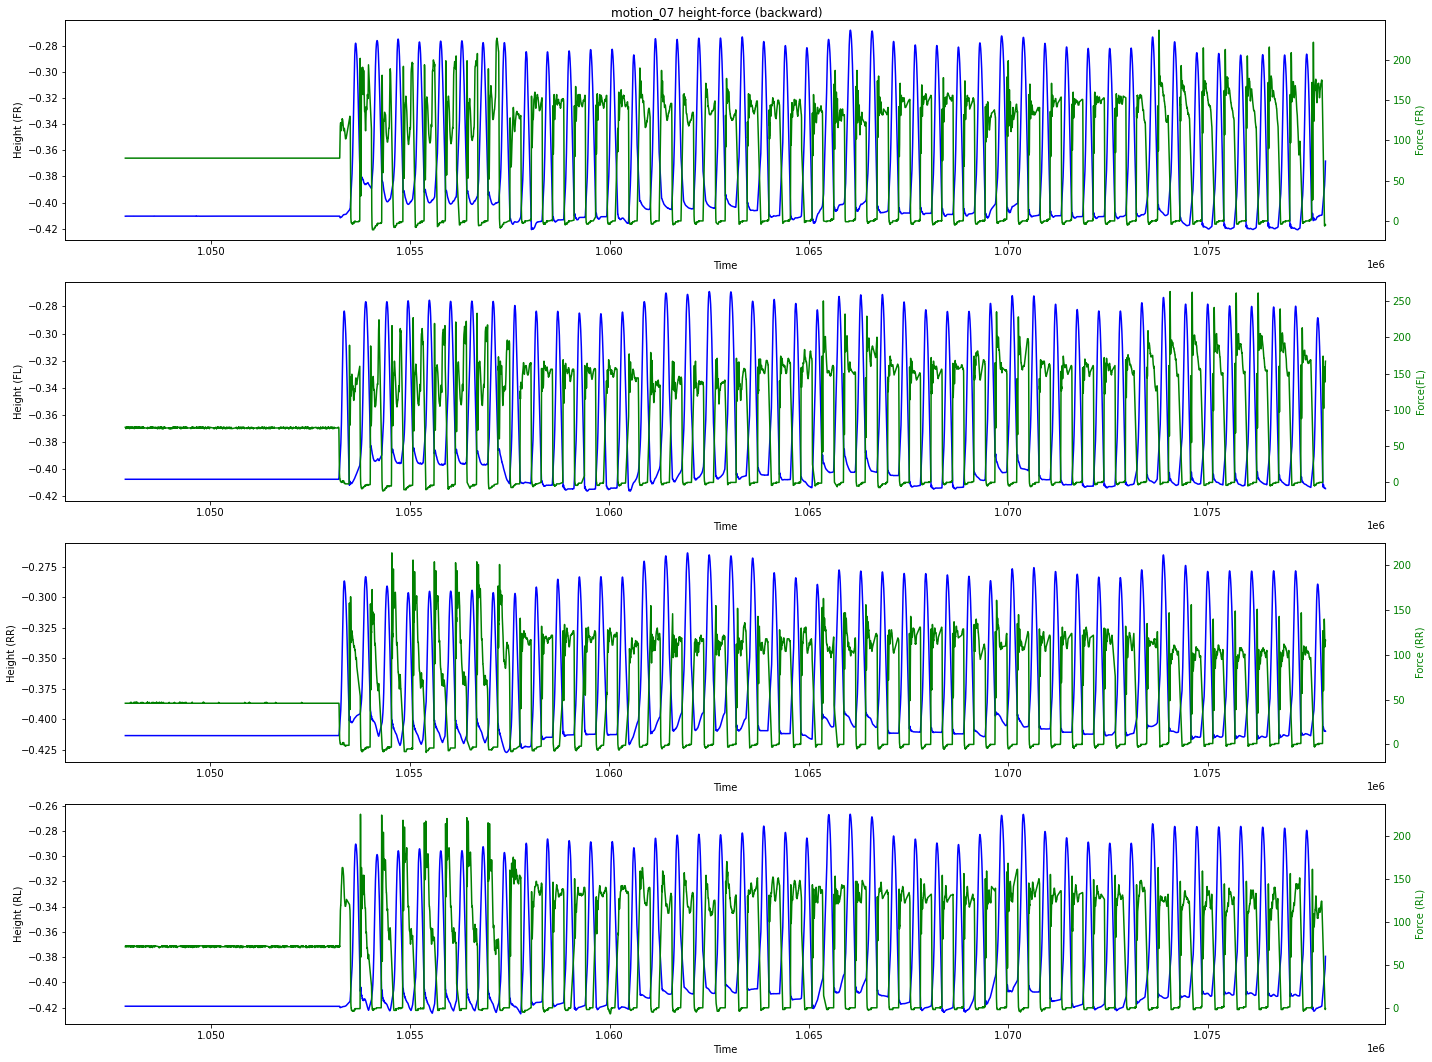

In [12]:
# Backwards
bwd_cmds = get_specific_cmd(motion_07, -velocity, 0, 0)
motion_07_bwd = motion_07[bwd_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_07_bwd)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_07 height-force (backward)",
                      motion_07,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

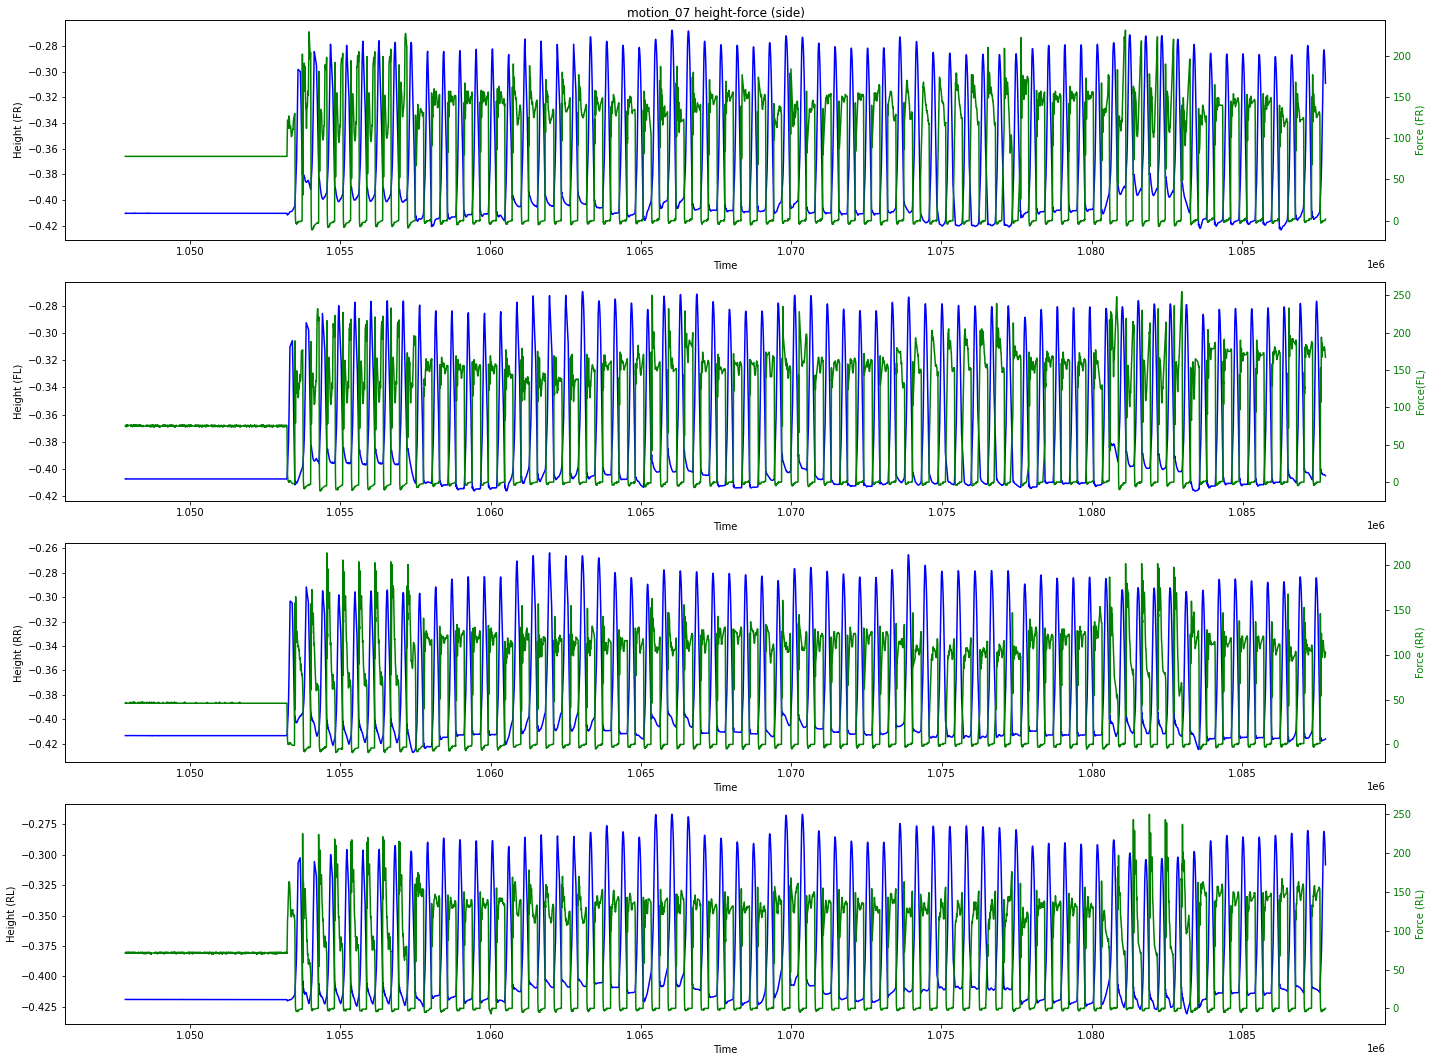

In [13]:
# Side (right)
side_cmds = get_specific_cmd(motion_07, 0, velocity, 0)
motion_07_side = motion_07[side_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_07_side)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_07 height-force (side)",
                      motion_07,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

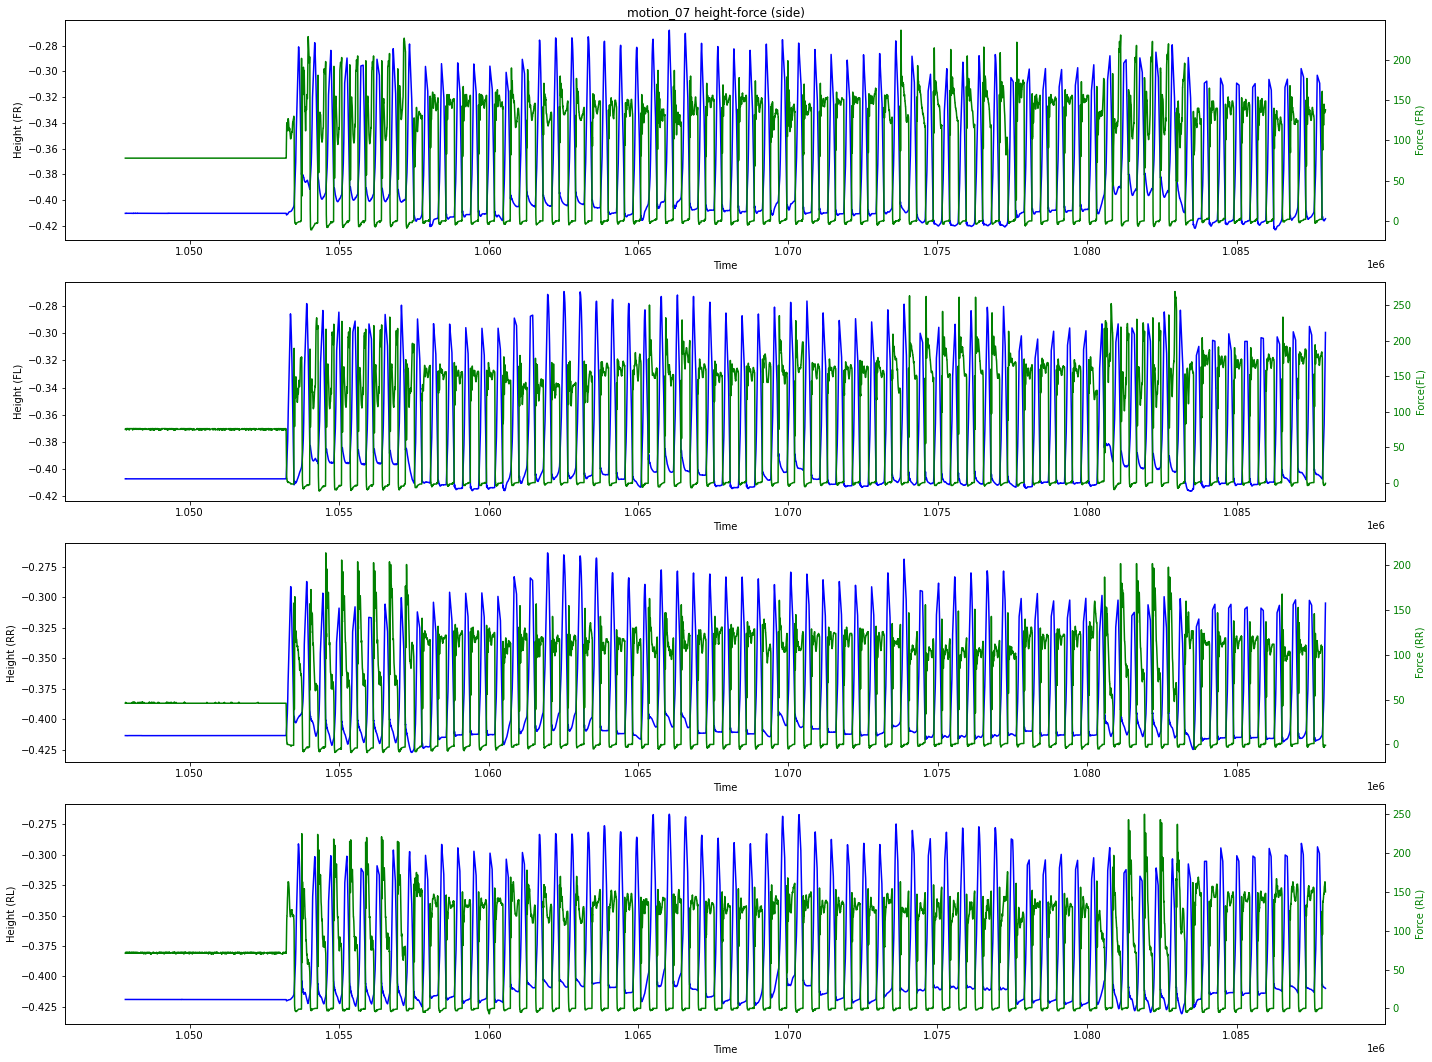

In [14]:
# Side (left)
side_cmds = get_specific_cmd(motion_07, 0, -velocity, 0)
motion_07_side = motion_07[side_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_07_side)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_07 height-force (side)",
                      motion_07,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

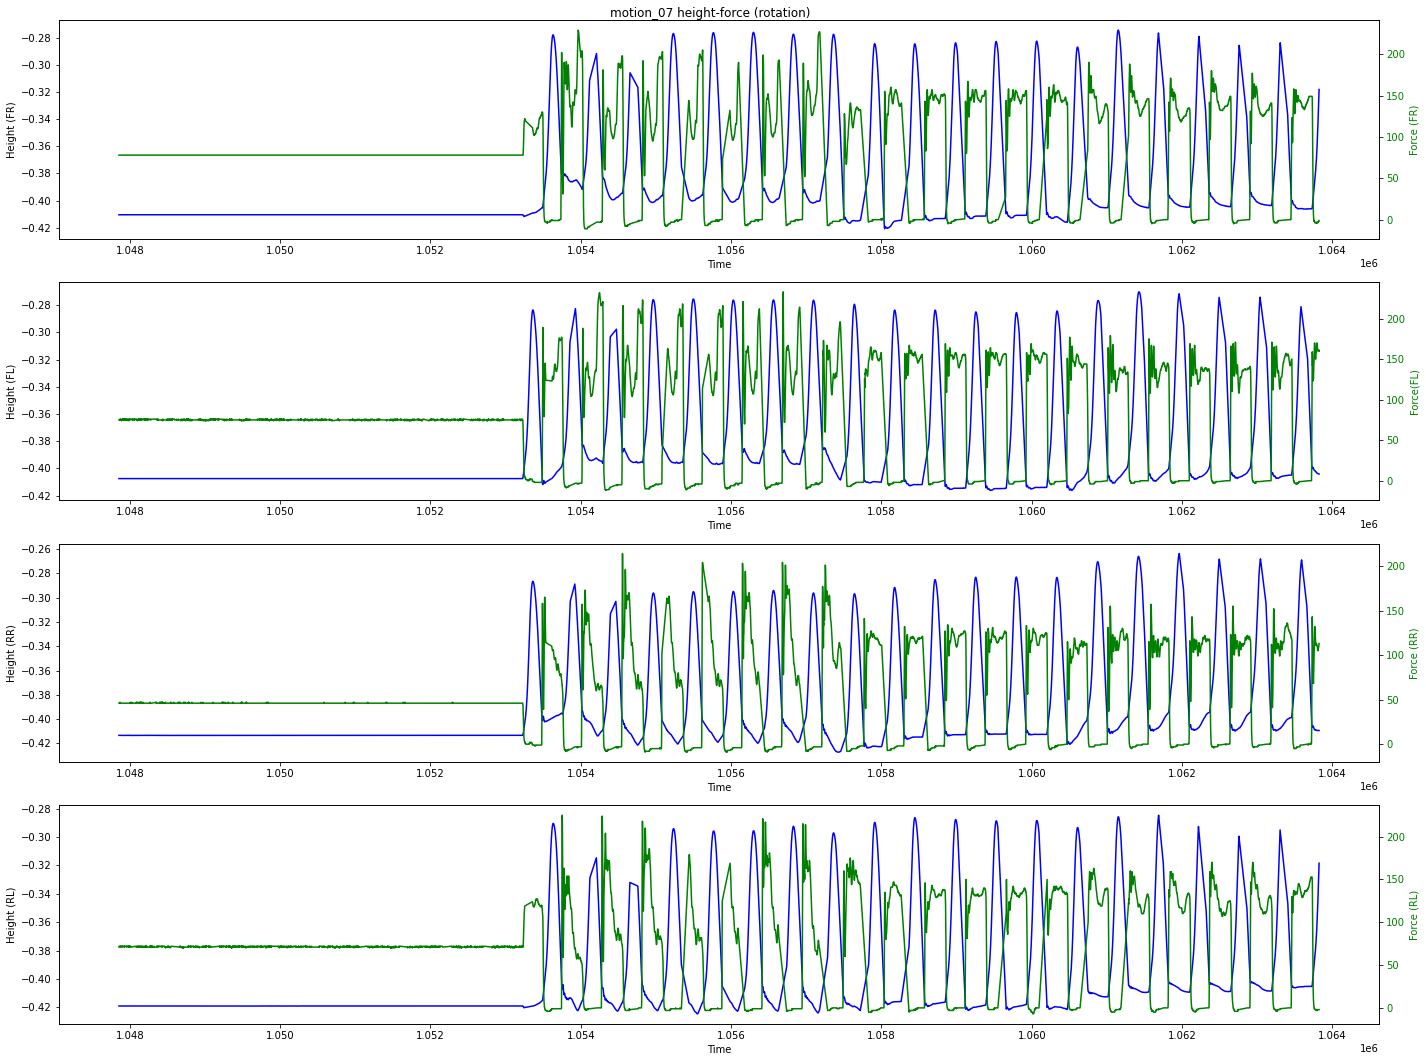

In [15]:
# Rotation (clockwise)
rot_cmds = get_specific_cmd(motion_07, 0, 0, velocity)
motion_07_rot = motion_07[rot_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_07_rot)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_07 height-force (rotation)",
                      motion_07,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

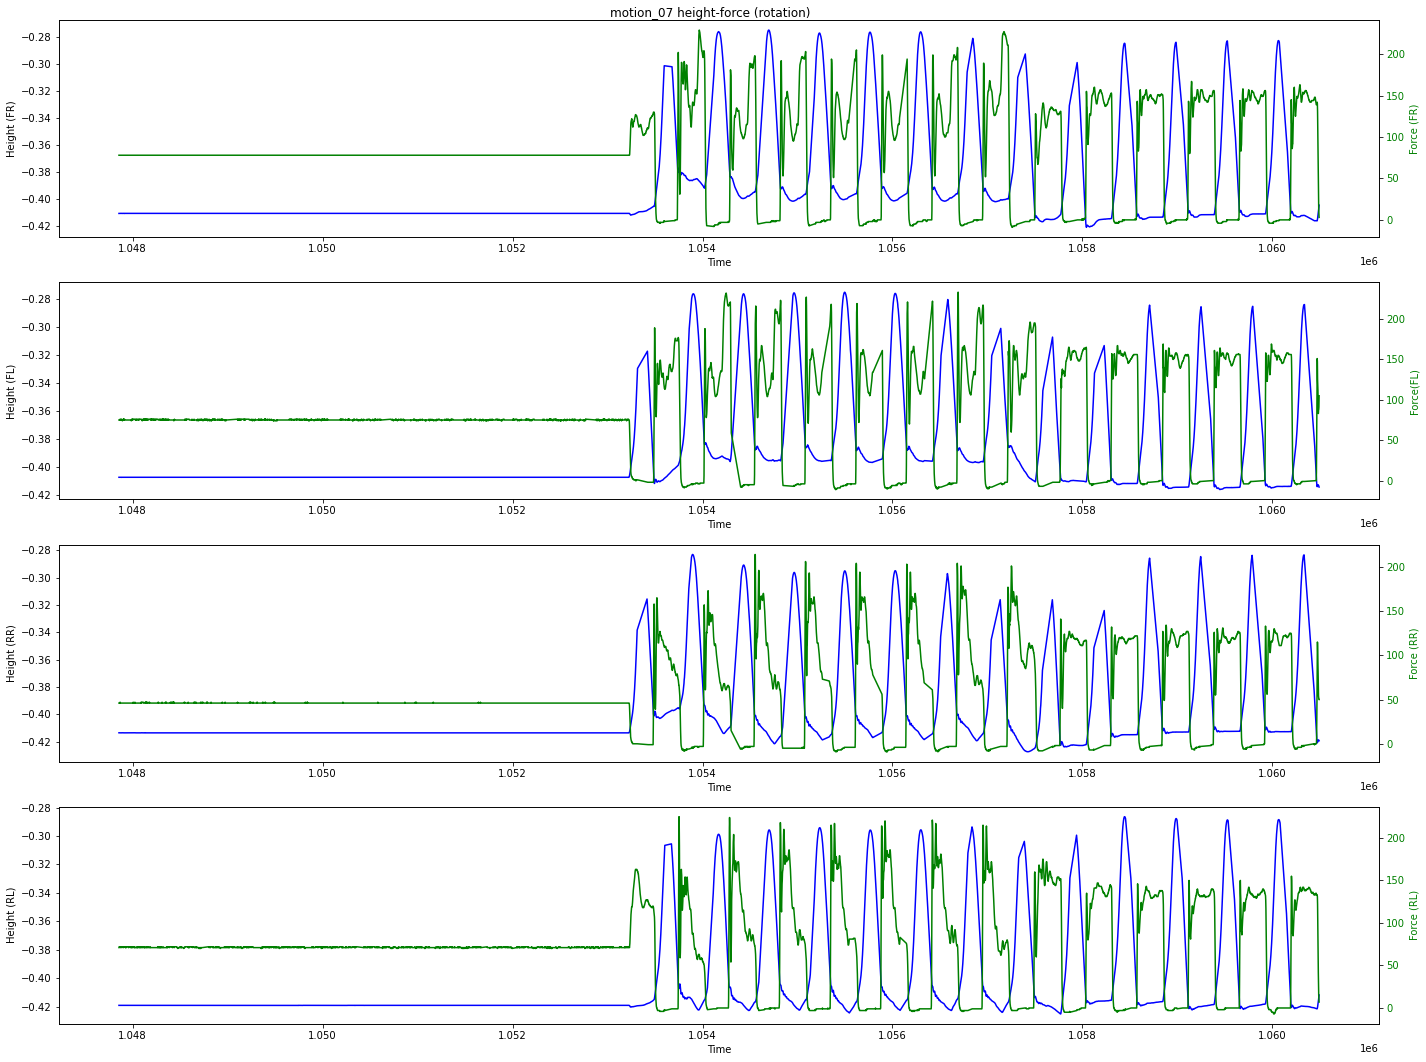

In [16]:
# Rotation (counter clockwise)
rot_cmds = get_specific_cmd(motion_07, 0, 0, -velocity)
motion_07_rot = motion_07[rot_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_07_rot)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_07 height-force (rotation)",
                      motion_07,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

## Footsteps Extraction (Height + Force)

In [17]:
def extract_footsteps(dataset, height_threshold=0.1, force_thresholds=[100,100,100,100]):
    # Compute height difference for FR and FL
    fr_fl_diff = np.round(abs(dataset[:, 34] - dataset[:, 37]), 9)

    # Compute height difference for RR and RL
    rr_rl_diff = np.round(abs(dataset[:, 40] - dataset[:, 43]), 9)

    # Compute compound difference for all foots
    height_diff = np.round(fr_fl_diff + rr_rl_diff, 9)
    print("Min and max diff between front and rear feet", min(height_diff), max(height_diff), "\n")
    
    # Find footsteps (based on height difference)
    footsteps_height = np.where(height_diff < height_threshold)[0]
    print("Amount of footsteps found with height criteria: ", len(footsteps_height), "\n")
    
    # Footsteps that belong to motion commands
    footsteps_due_to_motion = len(np.intersect1d(np.where(np.any(dataset[:, 2:5], axis=1))[0], footsteps_height))
    print("Intersection with motion commands: ", footsteps_due_to_motion, "\n")
    
    # Footsteps that belong to idle mode
    footsteps_due_to_stationarity = len(np.intersect1d(np.where(~np.any(dataset[:, 2:5], axis=1))[0], footsteps_height))
    print("Intersection with no motion commands: ", footsteps_due_to_stationarity, "\n")
    
    # FR min height (i.e swining motion)
    rear_force_footsteps = np.where(np.logical_and(dataset[:, 58] > force_thresholds[0], 
                                                   dataset[:, 59] > force_thresholds[1]))[0]
    front_force_footsteps = np.where(np.logical_and(dataset[:, 56] > force_thresholds[2], 
                                                    dataset[:, 57] > force_thresholds[3]))[0]

    # Find footsteps that match force constraints on all foot
    footsteps_force = np.intersect1d(rear_force_footsteps, front_force_footsteps)
    print("Number of force footsteps: ", len(footsteps_force), "\n")
    
    # Find force and height footsteps intersection
    force_height_footsteps = np.intersect1d(footsteps_force, footsteps_height)
    print("Number of height-force footsteps: ", len(force_height_footsteps), "\n")
    
    # Footsteps (from force and height) that belong to motion commands
    footsteps_due_to_motion = len(np.intersect1d(np.where(np.any(dataset[:, 2:5], axis=1))[0], force_height_footsteps))
    print("Number of footsteps extracted with height-force due to motion: ", footsteps_due_to_motion, "\n")
    
    # Footsteps (from force and height) that belong to motion commands
    footsteps_due_to_stationarity = len(np.intersect1d(np.where(~np.any(dataset[:, 2:5], axis=1))[0], force_height_footsteps))
    print("Number of footsteps extracted with height-force due to no motion: ", footsteps_due_to_stationarity, "\n")
    
    return force_height_footsteps

def footsteps_nms(dataset, footsteps):
    footsteps_nms = []

    footsteps_sort, timestamps_sort = zip(*sorted(zip(footsteps, dataset[footsteps, 0])))

    for idx, footstep_sort in enumerate(footsteps_sort):
        if idx > 0:
            if abs(dataset[footstep_sort, 0] - dataset[footsteps_sort[idx-1], 0]) < 9:
                continue
            else:
                footsteps_nms.append(footstep_sort)
        else:
            footsteps_nms.append(footstep_sort)

    return np.asarray(footsteps_nms)

## Footsteps

In [18]:
def footstep_extraction_and_plotting(dataset, velocities, height_threshold, force_thresholds, indexes):
    # Extract backward motion entries
    cmds = get_specific_cmd(dataset, velocities[0], velocities[1], velocities[2])
    motion_07_cmds = motion_07[cmds]
    fr_min_height, fl_min_height, rr_min_height, rl_min_height = get_swinging_motions(motion_07_cmds)
    print("Foot swinging motions lenghts: ", len(fr_min_height), len(fl_min_height), len(rr_min_height), len(rl_min_height))
    
    # Extract footsteps
    footsteps = extract_footsteps(motion_07_cmds, height_threshold, force_thresholds)
    print("Footsteps extracted: ", len(footsteps))
    
    # Footsteps NMS
    footsteps_after_nms = footsteps_nms(motion_07_cmds, footsteps)
    print("Footsteps after non-maximum-suppression: ", len(footsteps_after_nms))
    
    # Plot footsteps
    sample_walking_fr_height = fr_min_height[indexes]
    sample_walking_fl_height = fl_min_height[indexes]
    sample_walking_rr_height = rr_min_height[indexes]
    sample_walking_rl_height = rl_min_height[indexes]

    plot_overlapping_data("Footsteps",
                          motion_07_cmds,
                          [sample_walking_fr_height, 
                           sample_walking_fl_height, 
                           sample_walking_rr_height,
                           sample_walking_rl_height],
                           [34, 56, 37, 57, 40, 58, 43, 59],
                           True,
                           motion_07_cmds[footsteps_nms(motion_07_cmds, footsteps), 0])
    
    return motion_07_cmds, footsteps_after_nms

### Forward motion

Foot swinging motions lenghts:  14464 14617 15643 16047
Min and max diff between front and rear feet 0.000169 0.263749 

Amount of footsteps found with height criteria:  12024 

Intersection with motion commands:  12024 

Intersection with no motion commands:  0 

Number of force footsteps:  824 

Number of height-force footsteps:  824 

Number of footsteps extracted with height-force due to motion:  824 

Number of footsteps extracted with height-force due to no motion:  0 

Footsteps extracted:  824
Footsteps after non-maximum-suppression:  131


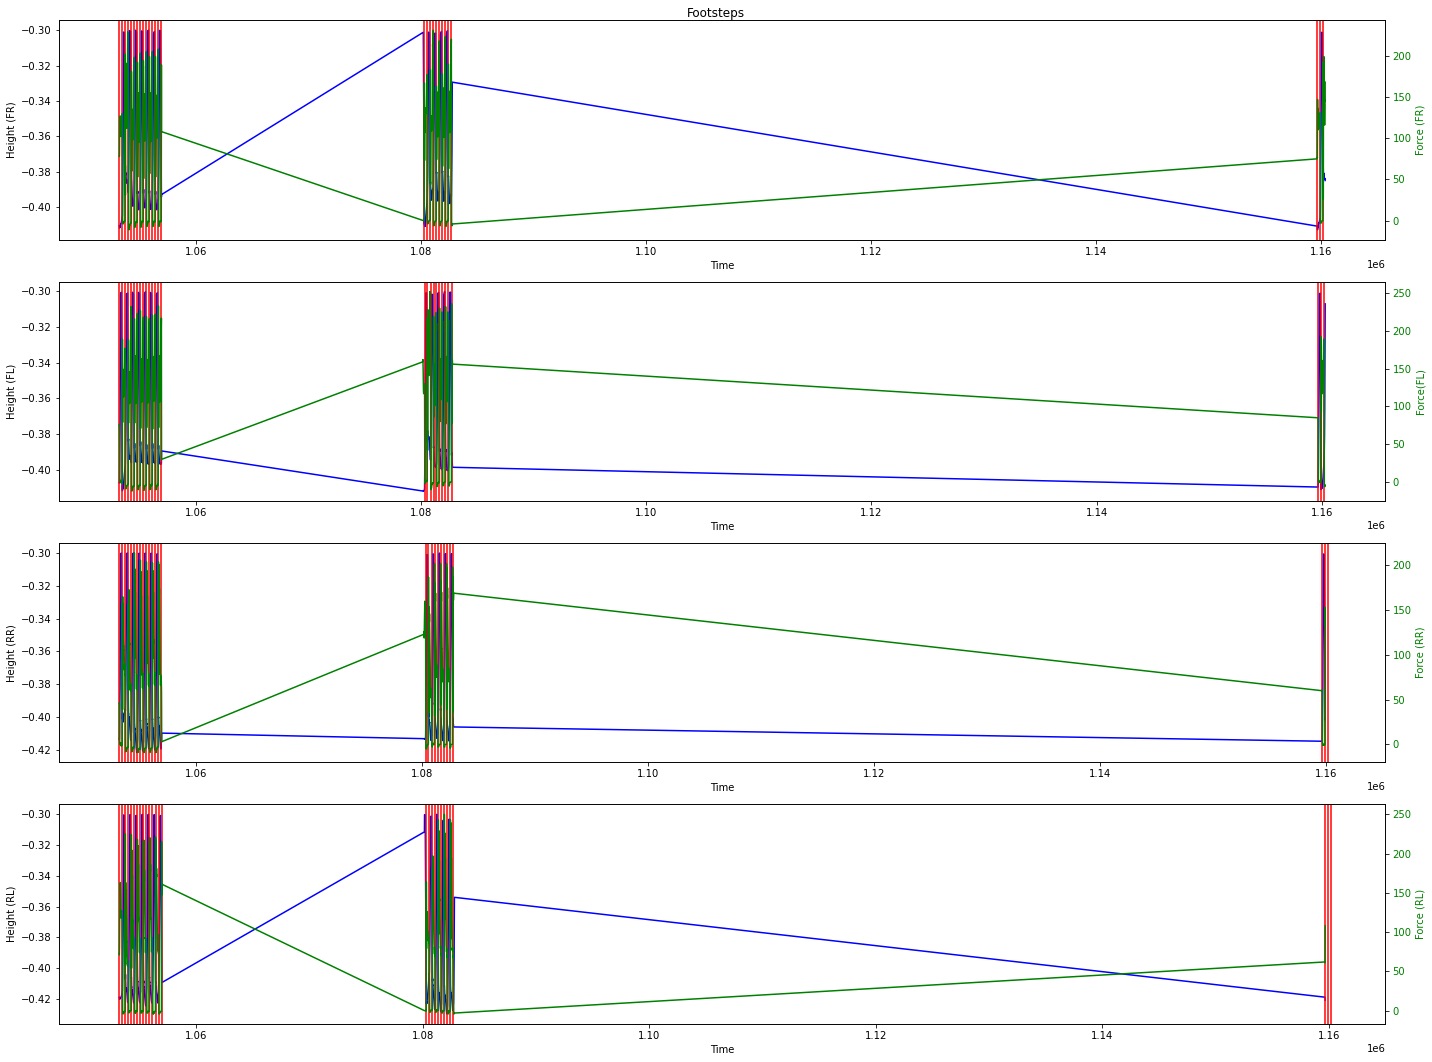

In [19]:
motion_07_fwd, footsteps_07_fwd = footstep_extraction_and_plotting(dataset=motion_07, velocities=[velocity, 0, 0], height_threshold=0.2, force_thresholds=[40,40,40,40], indexes=range(0, 3000))

### Backward motion

Foot swinging motions lenghts:  13163 13005 12803 12865
Min and max diff between front and rear feet 0.000292 0.282316 

Amount of footsteps found with height criteria:  5911 

Intersection with motion commands:  5911 

Intersection with no motion commands:  0 

Number of force footsteps:  377 

Number of height-force footsteps:  377 

Number of footsteps extracted with height-force due to motion:  377 

Number of footsteps extracted with height-force due to no motion:  0 

Footsteps extracted:  377
Footsteps after non-maximum-suppression:  107


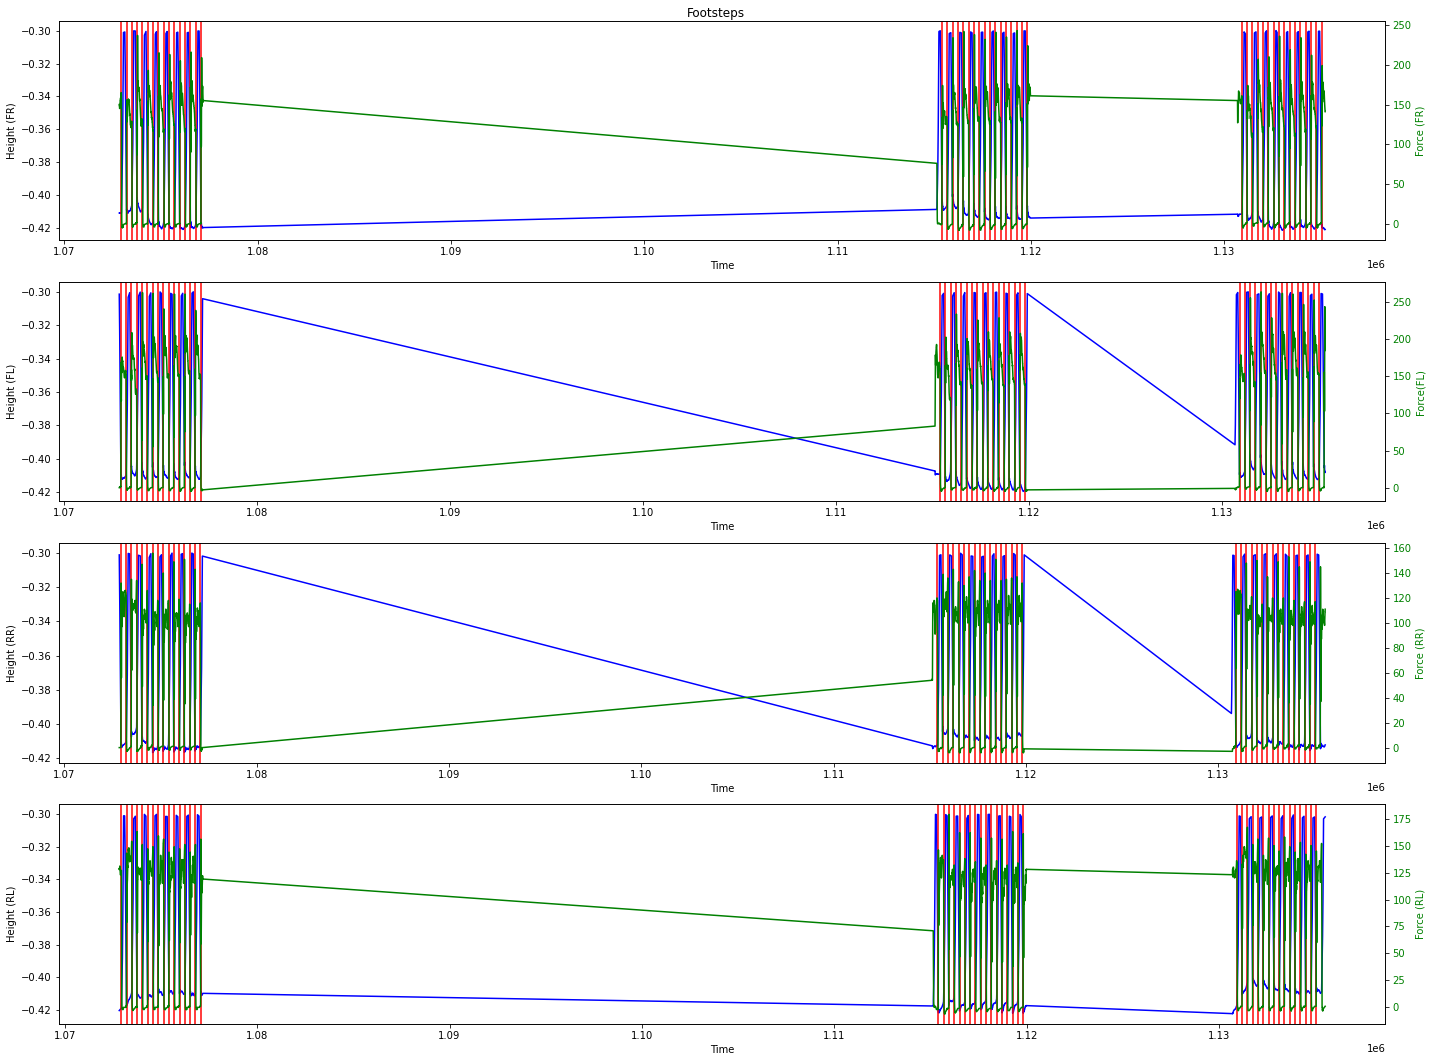

In [20]:
motion_07_bwd, footsteps_07_bwd = footstep_extraction_and_plotting(dataset=motion_07, velocities=[-velocity, 0, 0], height_threshold=0.1, force_thresholds=[80,80,80,80], indexes=range(0, 6000))

### Side motion (right)

Foot swinging motions lenghts:  17136 16939 17497 17517
Min and max diff between front and rear feet 0.000325 0.269092 

Amount of footsteps found with height criteria:  7967 

Intersection with motion commands:  7967 

Intersection with no motion commands:  0 

Number of force footsteps:  560 

Number of height-force footsteps:  560 

Number of footsteps extracted with height-force due to motion:  560 

Number of footsteps extracted with height-force due to no motion:  0 

Footsteps extracted:  560
Footsteps after non-maximum-suppression:  147


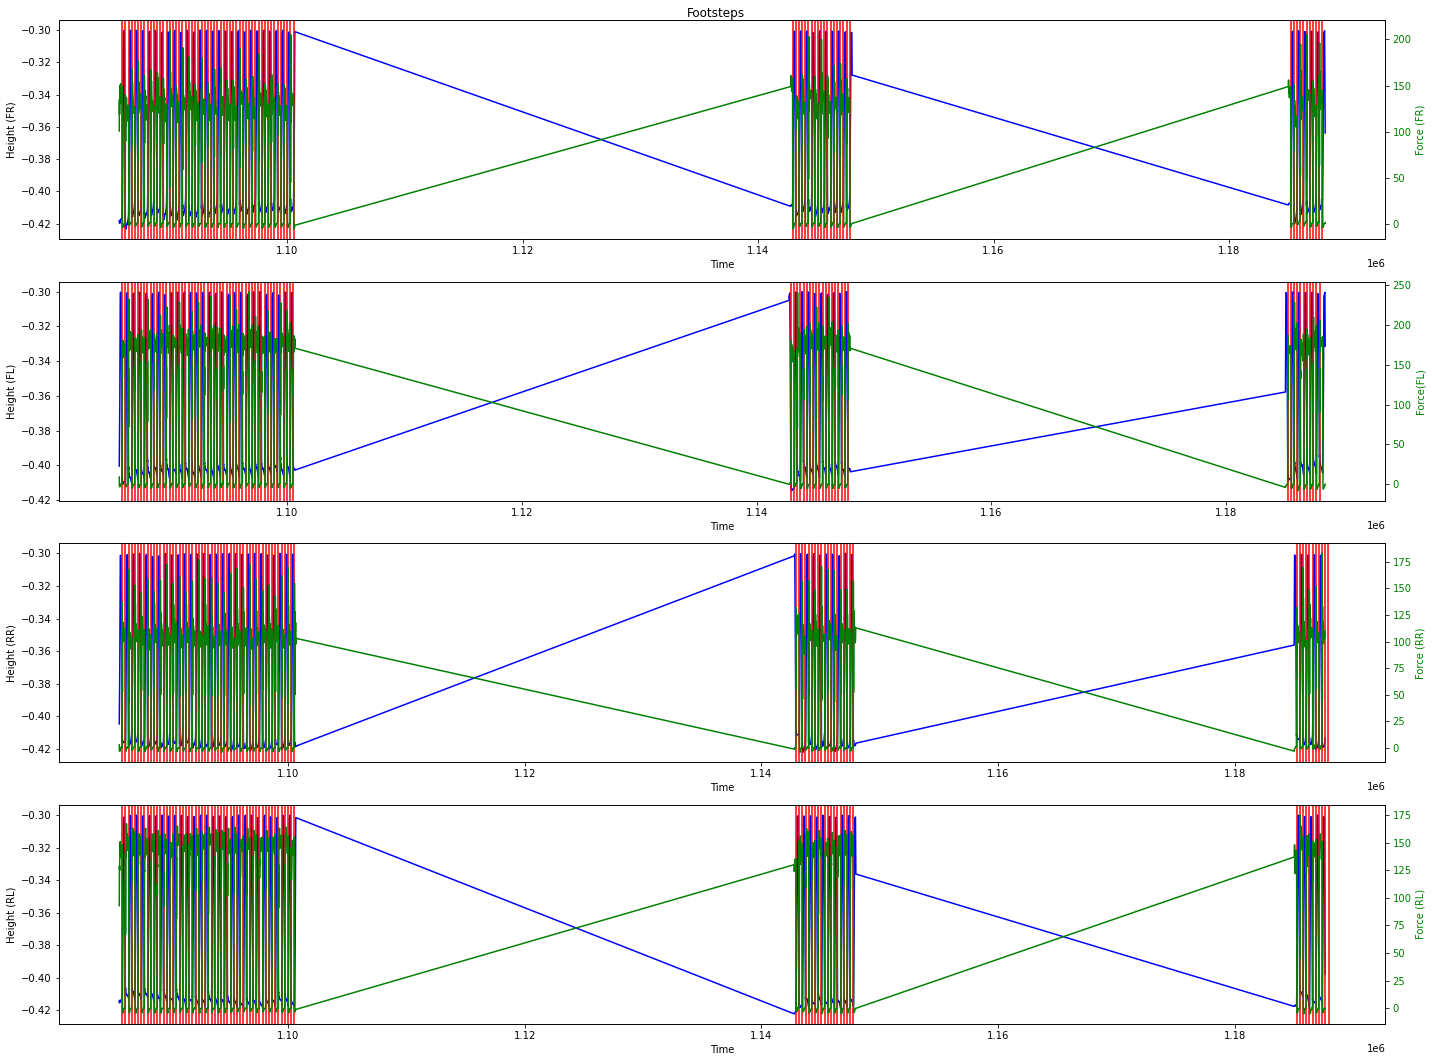

In [21]:
motion_07_side_right, footsteps_07_side_right = footstep_extraction_and_plotting(dataset=motion_07, velocities=[0, velocity, 0], height_threshold=0.1, force_thresholds=[80,80,80,80], indexes=range(0, 10000))

### Side (left)

Foot swinging motions lenghts:  17190 17166 17247 17710
Min and max diff between front and rear feet 0.000203 0.268937 

Amount of footsteps found with height criteria:  8039 

Intersection with motion commands:  8039 

Intersection with no motion commands:  0 

Number of force footsteps:  601 

Number of height-force footsteps:  601 

Number of footsteps extracted with height-force due to motion:  601 

Number of footsteps extracted with height-force due to no motion:  0 

Footsteps extracted:  601
Footsteps after non-maximum-suppression:  149


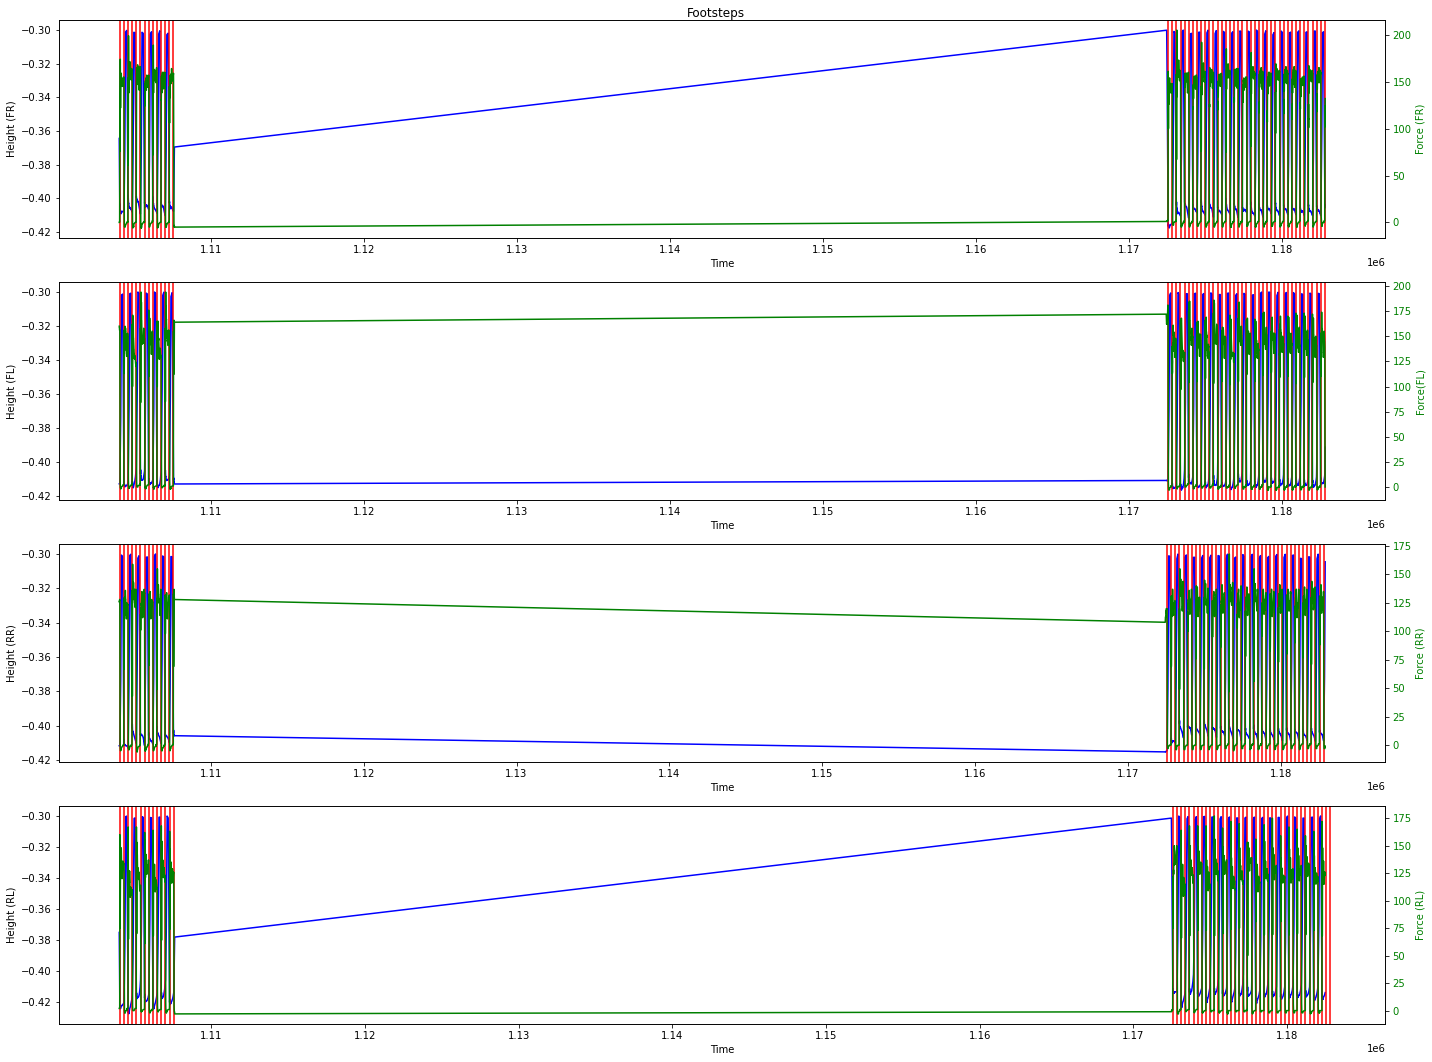

In [22]:
motion_07_side_left, footsteps_07_side_left = footstep_extraction_and_plotting(dataset=motion_07, velocities=[0, -velocity, 0], height_threshold=0.1, force_thresholds=[80,80,80,80], indexes=range(0, 6000))

### Rotation (clockwise)

Foot swinging motions lenghts:  6651 6788 6911 6622
Min and max diff between front and rear feet 0.000391 0.270385 

Amount of footsteps found with height criteria:  3261 

Intersection with motion commands:  3261 

Intersection with no motion commands:  0 

Number of force footsteps:  191 

Number of height-force footsteps:  191 

Number of footsteps extracted with height-force due to motion:  191 

Number of footsteps extracted with height-force due to no motion:  0 

Footsteps extracted:  191
Footsteps after non-maximum-suppression:  59


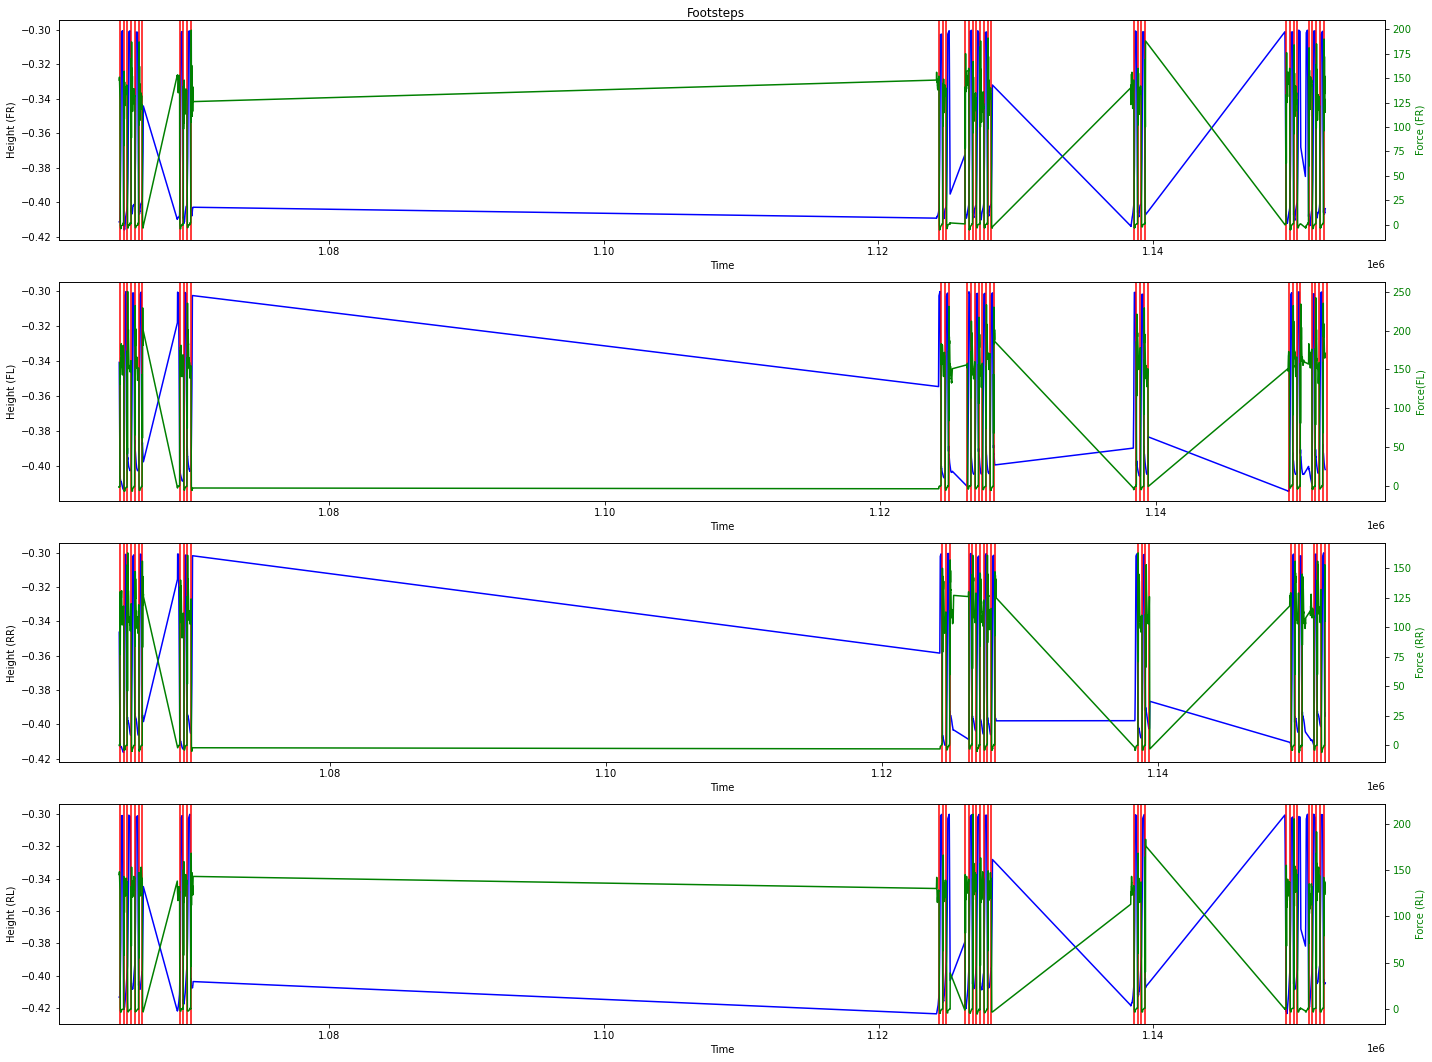

In [23]:
motion_07_clock, footsteps_07_clock = footstep_extraction_and_plotting(dataset=motion_07, velocities=[0, 0, velocity], height_threshold=0.1, force_thresholds=[90,90,90,90], indexes=range(0, 4000))

### Rotation (counter clockwise)

Foot swinging motions lenghts:  5463 5171 5177 5654
Min and max diff between front and rear feet 0.000317 0.277541 

Amount of footsteps found with height criteria:  2551 

Intersection with motion commands:  2551 

Intersection with no motion commands:  0 

Number of force footsteps:  189 

Number of height-force footsteps:  189 

Number of footsteps extracted with height-force due to motion:  189 

Number of footsteps extracted with height-force due to no motion:  0 

Footsteps extracted:  189
Footsteps after non-maximum-suppression:  45


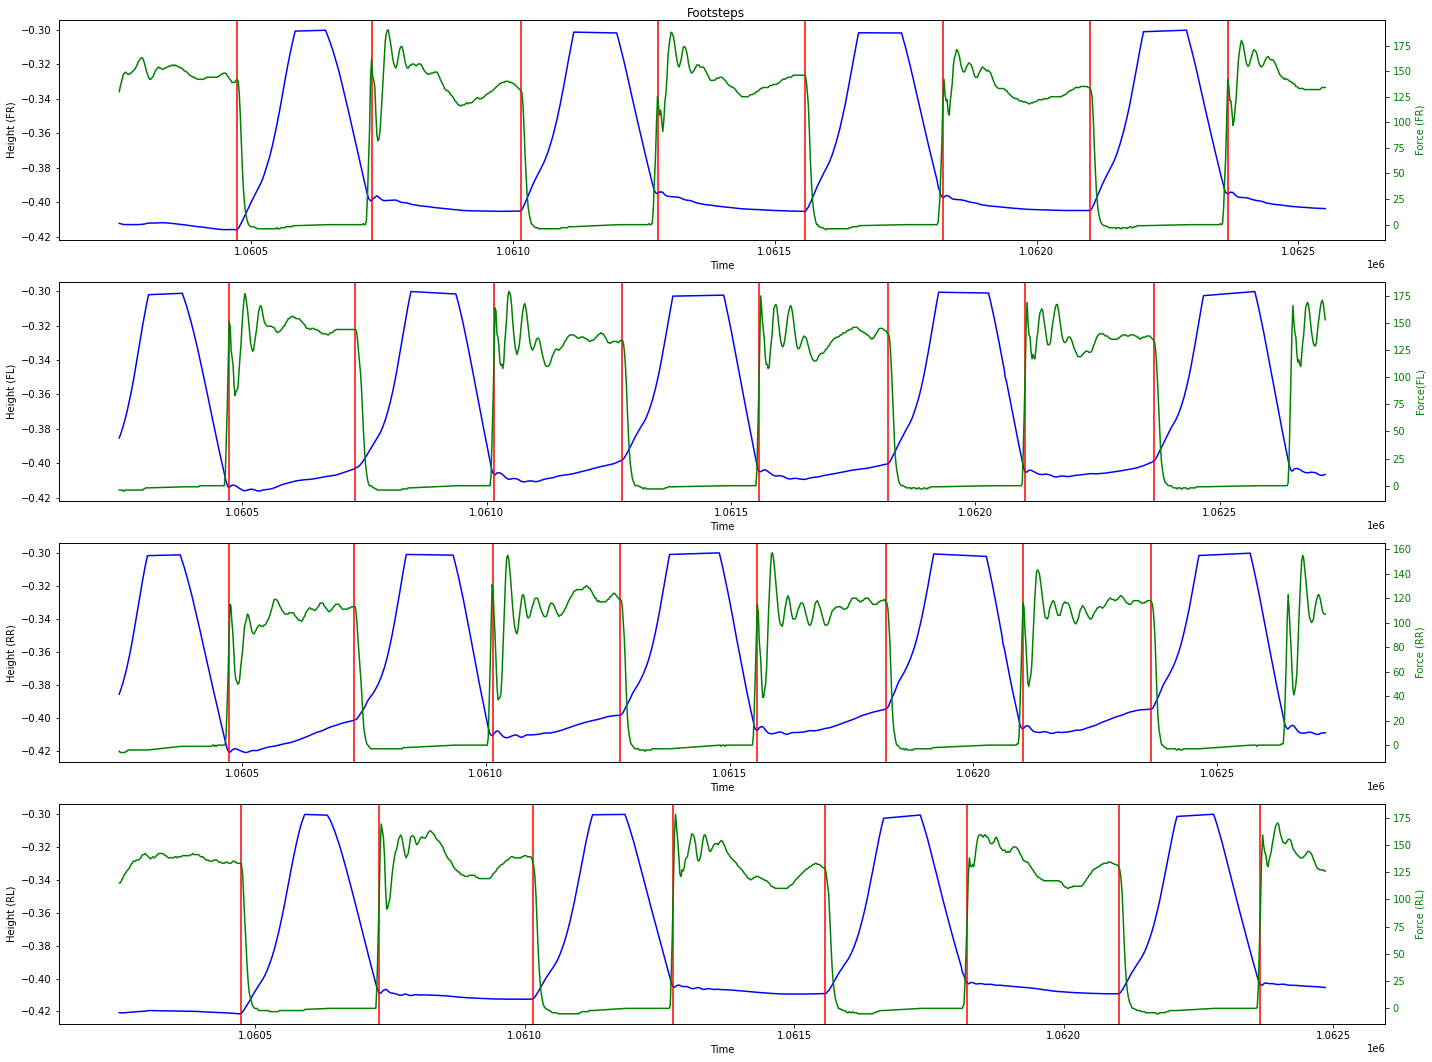

In [24]:
motion_07_count, footsteps_07_count = footstep_extraction_and_plotting(dataset=motion_07, velocities=[0, 0, -velocity], height_threshold=0.1, force_thresholds=[80,80,80,80], indexes=range(0, 1000))

### Step size

In [25]:
def get_step_size(dataset, footsteps, idx_coord=[32,35,38,41]):
    # Footsteps sizes
    step_size_fr = []
    step_size_fl = []
    step_size_rr = []
    step_size_rl = []
    footstep_period = []
    
    # Compute step sizes
    for idx, footstep in enumerate(footsteps):
        if idx > 0:
            time_diff = dataset[footsteps[idx], 0] - dataset[footsteps[idx-1], 0]
            
            if time_diff < 300:
                footstep_period.append(time_diff)
                step_size_fr.append(dataset[footsteps[idx], idx_coord[0]] - dataset[footsteps[idx-1], idx_coord[0]])
                step_size_fl.append(dataset[footsteps[idx], idx_coord[1]] - dataset[footsteps[idx-1], idx_coord[1]])
                step_size_rr.append(dataset[footsteps[idx], idx_coord[2]] - dataset[footsteps[idx-1], idx_coord[2]])
                step_size_rl.append(dataset[footsteps[idx], idx_coord[3]] - dataset[footsteps[idx-1], idx_coord[3]])
    
    # Convert to numpy array
    step_size_fr_numpy = np.array(step_size_fr)
    step_size_fl_numpy = np.array(step_size_fl)
    step_size_rr_numpy = np.array(step_size_rr)
    step_size_rl_numpy = np.array(step_size_rl)
    footstep_period_numpy = np.array(footstep_period)
    
    # Only keep positive footsteps
    step_size_fr_numpy = step_size_fr_numpy[np.where(step_size_fr_numpy > 0)[0]]
    step_size_fl_numpy = step_size_fr_numpy[np.where(step_size_fr_numpy > 0)[0]]
    step_size_rr_numpy = step_size_fr_numpy[np.where(step_size_fr_numpy > 0)[0]]
    step_size_rl_numpy = step_size_fr_numpy[np.where(step_size_fr_numpy > 0)[0]]
    
    # Print average step-size
    print("Avg. step size time: ", np.mean(footstep_period_numpy))
    print("Avg. step size for FR foot: ", np.mean(step_size_fr_numpy))
    print("Avg. step size for FL foot: ", np.mean(step_size_fl_numpy))
    print("Avg. step size for RR foot: ", np.mean(step_size_rr_numpy))
    print("Avg. step size for RL foot: ", np.mean(step_size_rl_numpy), '\n')

    # Print std. dev. step-size
    print("Std. dev. step size for FR foot: ", np.std(step_size_fr_numpy))
    print("Std. dev. step size for FL foot: ", np.std(step_size_fl_numpy))
    print("Std. dev. step size for RR foot: ", np.std(step_size_rr_numpy))
    print("Std. dev. step size for RL foot: ", np.std(step_size_rl_numpy), '\n')
    
    return step_size_fr_numpy, step_size_fl_numpy, step_size_rr_numpy, step_size_rl_numpy

#### Forward motion

In [26]:
# Step size and velocity along x axis 
step_size_fr_x,_,_,_ = get_step_size(motion_07_fwd, footsteps_07_fwd)

Avg. step size time:  266.61475409836066
Avg. step size for FR foot:  0.24508526779661016
Avg. step size for FL foot:  0.24508526779661016
Avg. step size for RR foot:  0.24508526779661016
Avg. step size for RL foot:  0.24508526779661016 

Std. dev. step size for FR foot:  0.061495613151625585
Std. dev. step size for FL foot:  0.061495613151625585
Std. dev. step size for RR foot:  0.061495613151625585
Std. dev. step size for RL foot:  0.061495613151625585 



In [27]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_07_fwd, footsteps_07_fwd, idx_coord=[33, 36, 39, 42])

Avg. step size time:  266.61475409836066
Avg. step size for FR foot:  0.025024857377049185
Avg. step size for FL foot:  0.025024857377049185
Avg. step size for RR foot:  0.025024857377049185
Avg. step size for RL foot:  0.025024857377049185 

Std. dev. step size for FR foot:  0.019739227634070655
Std. dev. step size for FL foot:  0.019739227634070655
Std. dev. step size for RR foot:  0.019739227634070655
Std. dev. step size for RL foot:  0.019739227634070655 



### Backward motion

In [28]:
# Step size and velocity along x axis 
step_size_fr_x,_,_,_ = get_step_size(motion_07_bwd, footsteps_07_bwd)

Avg. step size time:  274.98
Avg. step size for FR foot:  0.10038205882352941
Avg. step size for FL foot:  0.10038205882352941
Avg. step size for RR foot:  0.10038205882352941
Avg. step size for RL foot:  0.10038205882352941 

Std. dev. step size for FR foot:  0.0253992353717022
Std. dev. step size for FL foot:  0.0253992353717022
Std. dev. step size for RR foot:  0.0253992353717022
Std. dev. step size for RL foot:  0.0253992353717022 



In [29]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_07_bwd, footsteps_07_bwd, idx_coord=[33, 36, 39, 42])

Avg. step size time:  274.98
Avg. step size for FR foot:  0.02073834693877551
Avg. step size for FL foot:  0.02073834693877551
Avg. step size for RR foot:  0.02073834693877551
Avg. step size for RL foot:  0.02073834693877551 

Std. dev. step size for FR foot:  0.010832721034074613
Std. dev. step size for FL foot:  0.010832721034074613
Std. dev. step size for RR foot:  0.010832721034074613
Std. dev. step size for RL foot:  0.010832721034074613 



### Side motion (right)

In [30]:
# Step size and velocity along x axis 
step_size_fr_x,_,_,_ = get_step_size(motion_07_side_right, footsteps_07_side_right)

Avg. step size time:  269.8098591549296
Avg. step size for FR foot:  0.003889802631578948
Avg. step size for FL foot:  0.003889802631578948
Avg. step size for RR foot:  0.003889802631578948
Avg. step size for RL foot:  0.003889802631578948 

Std. dev. step size for FR foot:  0.002642121785012032
Std. dev. step size for FL foot:  0.002642121785012032
Std. dev. step size for RR foot:  0.002642121785012032
Std. dev. step size for RL foot:  0.002642121785012032 



In [31]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_07_side_right, footsteps_07_side_right, idx_coord=[33, 36, 39, 42])

Avg. step size time:  269.8098591549296
Avg. step size for FR foot:  0.04668986956521739
Avg. step size for FL foot:  0.04668986956521739
Avg. step size for RR foot:  0.04668986956521739
Avg. step size for RL foot:  0.04668986956521739 

Std. dev. step size for FR foot:  0.013947166082635208
Std. dev. step size for FL foot:  0.013947166082635208
Std. dev. step size for RR foot:  0.013947166082635208
Std. dev. step size for RL foot:  0.013947166082635208 



### Side motions (left)

In [32]:
# Step size and velocity along x axis 
step_size_fr_x,_,_,_ = get_step_size(motion_07_side_left, footsteps_07_side_left)

Avg. step size time:  269.88275862068963
Avg. step size for FR foot:  0.01865295945945946
Avg. step size for FL foot:  0.01865295945945946
Avg. step size for RR foot:  0.01865295945945946
Avg. step size for RL foot:  0.01865295945945946 

Std. dev. step size for FR foot:  0.00397546281663715
Std. dev. step size for FL foot:  0.00397546281663715
Std. dev. step size for RR foot:  0.00397546281663715
Std. dev. step size for RL foot:  0.00397546281663715 



In [33]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_07_side_left, footsteps_07_side_left, idx_coord=[33, 36, 39, 42])

Avg. step size time:  269.88275862068963
Avg. step size for FR foot:  0.037877273611111116
Avg. step size for FL foot:  0.037877273611111116
Avg. step size for RR foot:  0.037877273611111116
Avg. step size for RL foot:  0.037877273611111116 

Std. dev. step size for FR foot:  0.013692721257985463
Std. dev. step size for FL foot:  0.013692721257985463
Std. dev. step size for RR foot:  0.013692721257985463
Std. dev. step size for RL foot:  0.013692721257985463 



### Rotation (clockwise)

In [34]:
# Step size and velocity along x axis 
step_size_fr_x,_,_,_ = get_step_size(motion_07_clock, footsteps_07_clock)

Avg. step size time:  271.24
Avg. step size for FR foot:  0.051901600000000006
Avg. step size for FL foot:  0.051901600000000006
Avg. step size for RR foot:  0.051901600000000006
Avg. step size for RL foot:  0.051901600000000006 

Std. dev. step size for FR foot:  0.020505127979117813
Std. dev. step size for FL foot:  0.020505127979117813
Std. dev. step size for RR foot:  0.020505127979117813
Std. dev. step size for RL foot:  0.020505127979117813 



In [35]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_07_clock, footsteps_07_clock, idx_coord=[33, 36, 39, 42])

Avg. step size time:  271.24
Avg. step size for FR foot:  0.06852241666666667
Avg. step size for FL foot:  0.06852241666666667
Avg. step size for RR foot:  0.06852241666666667
Avg. step size for RL foot:  0.06852241666666667 

Std. dev. step size for FR foot:  0.036096282883325476
Std. dev. step size for FL foot:  0.036096282883325476
Std. dev. step size for RR foot:  0.036096282883325476
Std. dev. step size for RL foot:  0.036096282883325476 



### Rotation (counter clockwise)

In [36]:
# Step size and velocity along x axis 
step_size_fr_x,_,_,_ = get_step_size(motion_07_count, footsteps_07_count)

Avg. step size time:  270.9736842105263
Avg. step size for FR foot:  0.02680165
Avg. step size for FL foot:  0.02680165
Avg. step size for RR foot:  0.02680165
Avg. step size for RL foot:  0.02680165 

Std. dev. step size for FR foot:  0.007485869376865993
Std. dev. step size for FL foot:  0.007485869376865993
Std. dev. step size for RR foot:  0.007485869376865993
Std. dev. step size for RL foot:  0.007485869376865993 



In [37]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_07_count, footsteps_07_count, idx_coord=[33, 36, 39, 42])

Avg. step size time:  270.9736842105263
Avg. step size for FR foot:  0.07441521052631579
Avg. step size for FL foot:  0.07441521052631579
Avg. step size for RR foot:  0.07441521052631579
Avg. step size for RL foot:  0.07441521052631579 

Std. dev. step size for FR foot:  0.016335024513599278
Std. dev. step size for FL foot:  0.016335024513599278
Std. dev. step size for RR foot:  0.016335024513599278
Std. dev. step size for RL foot:  0.016335024513599278 



### Footstep visualization

In [38]:
def visualize_static_foosteps(dataset, footsteps):
    old_xs = None
    old_ys = None
    old_zs = None
    
    # Visualize footsteps
    for idx, footstep in enumerate(footsteps):
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')

        #ax.set_xlim([-0.5, 0.5])
        #ax.set_ylim([-0.3, 0.3])
        ax.set_zlim([-0.5, 0.5])

        dataset[footstep, 32:44] = np.round(dataset[footstep, 32:44], 3)
        
        time_diff = dataset[footsteps[idx], 0] - dataset[footsteps[idx-1], 0]
            
        #if time_diff < 300:
        # 3D positions
        xs = np.array([dataset[footstep, 32], dataset[footstep, 35], dataset[footstep, 38], dataset[footstep, 41]])
        ys = np.array([dataset[footstep, 33], dataset[footstep, 36], dataset[footstep, 39], dataset[footstep, 42]])
        zs = np.array([dataset[footstep, 34], dataset[footstep, 37], dataset[footstep, 40], dataset[footstep, 43]])    

        ax.scatter(xs, ys, zs, marker='o')

        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')

        plt.show()

        #print(xs, ys, zs, dataset[footstep, 2:5], dataset[footstep, 25:28])
        if idx > 0 and idx < len(footsteps):
            print(f'Diff: {time_diff}. Command: {dataset[footstep, 2:5]}. State: {dataset[footstep, 25:28]}. Coord: {[xs[0], ys[0], zs[0]]}. Step size: {[xs[0]-old_xs[0], ys[0]-old_ys[0], zs[0]-old_zs[0]]}.')
        else:
            print(f'Command: {dataset[footstep, 2:5]}. State: {dataset[footstep, 25:28]}. Coord: {[xs[0], ys[0], zs[0]]}.')
            
        old_xs = xs
        old_ys = ys
        old_zs = zs

In [39]:
def update_points(num, dataset, footsteps, x, y, z, points):    
    # Starting footstep index
    footstep = footsteps[num]
    
    # Round footsteps position
    dataset[footstep, 32:44] = np.round(dataset[footstep, 32:44], 3)

    # Initial footsteps 3D positions
    new_x = np.array([dataset[footstep, 32], dataset[footstep, 35], dataset[footstep, 38], dataset[footstep, 41]])
    new_y = np.array([dataset[footstep, 33], dataset[footstep, 36], dataset[footstep, 39], dataset[footstep, 42]])
    new_z = np.array([dataset[footstep, 34], dataset[footstep, 37], dataset[footstep, 40], dataset[footstep, 43]])

    # update properties
    points.set_data(new_x, new_y)
    points.set_3d_properties(new_z, 'z')

    # return modified artists
    return points

def visualize_animated_footsteps(dataset, footsteps, style: str):
    # Create figure
    fig = plt.figure()
    ax = p3.Axes3D(fig)

    # Setting the axes properties
    ax.set_xlim3d([-0.4, 0.4])
    ax.set_xlabel('X')

    ax.set_ylim3d([-0.2, 0.2])
    ax.set_ylabel('Y')

    ax.set_zlim3d([-0.5, 0.5])
    ax.set_zlabel('Z')

    # Starting footstep index
    footstep = footsteps[0]

    # Round footsteps position
    dataset[footstep, 32:44] = np.round(dataset[footstep, 32:44], 3)

    # Initial footsteps 3D positions
    x = np.array([dataset[footstep, 32], dataset[footstep, 35], dataset[footstep, 38], dataset[footstep, 41]])
    y = np.array([dataset[footstep, 33], dataset[footstep, 36], dataset[footstep, 39], dataset[footstep, 42]])
    z = np.array([dataset[footstep, 34], dataset[footstep, 37], dataset[footstep, 40], dataset[footstep, 43]])

    txt = fig.suptitle('')
    points, = ax.plot(x, y, z, style)
    
    # blit=True re-draws only the parts that have changed.
    anim = animation.FuncAnimation(fig, update_points, frames=len(footsteps), fargs=(dataset, footsteps, x, y, z, points))
    
    return anim   

In [40]:
def update_prediction_points(dataset, num, x, y, z, points):  
    # Starting footstep index
    footstep = footsteps[num]
    
    # Round footsteps position
    D[footstep, 32:44] = np.round(dataset[footstep, 32:44], 3)

    # Initial footsteps 3D positions
    new_x = np.array([dataset[footstep, 32], dataset[footstep, 35], dataset[footstep, 38], dataset[footstep, 41]])
    new_y = np.array([dataset[footstep, 33], dataset[footstep, 36], dataset[footstep, 39], dataset[footstep, 42]])
    new_z = np.array([dataset[footstep, 34], dataset[footstep, 37], dataset[footstep, 40], dataset[footstep, 43]])

    # update properties
    points.set_data(new_x, new_y)
    points.set_3d_properties(new_z, 'z')

    # return modified artists
    return points

def visualize_predicted_animated_footsteps(dataset, footsteps, style: str):
    # Create figure
    fig = plt.figure()
    ax = p3.Axes3D(fig)

    # Setting the axes properties
    ax.set_xlim3d([-0.4, 0.4])
    ax.set_xlabel('X')

    ax.set_ylim3d([-0.2, 0.2])
    ax.set_ylabel('Y')

    ax.set_zlim3d([-0.5, 0.5])
    ax.set_zlabel('Z')

    # Starting footstep index
    footstep = footsteps[0]

    # Round footsteps position
    D[footstep, 32:44] = np.round(dataset[footstep, 32:44], 3)

    # Initial footsteps 3D positions
    x = np.array([dataset[footstep, 32], dataset[footstep, 35], dataset[footstep, 38], dataset[footstep, 41]])
    y = np.array([dataset[footstep, 33], dataset[footstep, 36], dataset[footstep, 39], dataset[footstep, 42]])
    z = np.array([dataset[footstep, 34], dataset[footstep, 37], dataset[footstep, 40], dataset[footstep, 43]])

    txt = fig.suptitle('')
    points, = ax.plot(x, y, z, style)
    
    # blit=True re-draws only the parts that have changed.
    anim = animation.FuncAnimation(fig, update_points, frames=len(footsteps), fargs=(dataset, x, y, z, points))
    
    return anim   

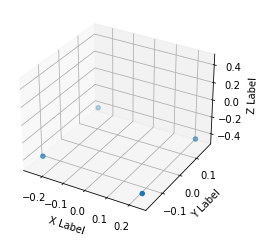

Time diff:  275.0
Footstep timestamp:  1053215.0
Height check index:  49
Height check timestamp:  1053314.0

FL moving: 0.07427500000000004. FR moving: 0.0006079999999999974
RL moving: 0.0002730000000000232. RR moving: 0.07865

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.410446. FR later: -0.409838
RR moving: -0.40748. RL moving: -0.333205

Coord FR: [0.237, -0.167, -0.41]. Coord FL: [0.233, 0.145, -0.407]. Coord RR: [-0.242, -0.142, -0.413]. Coord RL: [-0.253, 0.165, -0.419]

FR step_size: 0.08033399999999999. FL step_size: 0. RR step size: 0. RL step_size: 0.083262.


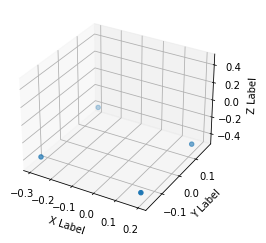

Time diff:  257.0
Footstep timestamp:  1053490.0
Height check index:  186
Height check timestamp:  1053589.0

FL moving: 0.001468999999999998. FR moving: 0.09214999999999995
RL moving: 0.08929199999999998. RR moving: 0.00024299999999999322

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.405313. FR later: -0.313163
RR moving: -0.41036. RL moving: -0.408891

Coord FR: [0.192, -0.165, -0.405]. Coord FL: [0.198, 0.121, -0.41]. Coord RR: [-0.283, -0.15, -0.401]. Coord RL: [-0.295, 0.17, -0.415]

FR step_size: 0.1850044. FL step_size: 0. RR step size: 0. RL step_size: 0.21930900000000003.


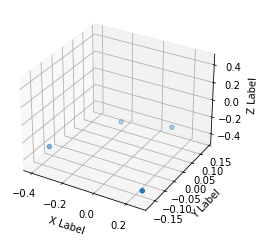

Time diff:  271.0
Footstep timestamp:  1053747.0
Height check index:  314
Height check timestamp:  1053846.0

FL moving: 0.07641300000000001. FR moving: 0.005888000000000004
RL moving: 0.008066000000000018. RR moving: 0.07261200000000001

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.379396. FR later: -0.385284
RR moving: -0.39843. RL moving: -0.322017

Coord FR: [0.27, -0.175, -0.379]. Coord FL: [0.091, 0.137, -0.398]. Coord RR: [-0.405, -0.11, -0.395]. Coord RL: [-0.197, 0.097, -0.405]

FR step_size: 0.47788130000000006. FL step_size: 0. RR step size: 0. RL step_size: 0.48614999999999997.


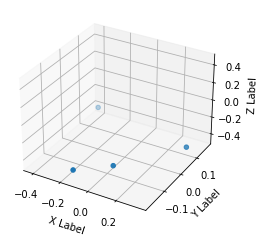

Time diff:  271.0
Footstep timestamp:  1054018.0
Height check index:  449
Height check timestamp:  1054117.0

FL moving: 0.012056999999999984. FR moving: 0.080262
RL moving: 0.08097599999999999. RR moving: 0.009338999999999986

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.391543. FR later: -0.311281
RR moving: -0.381828. RL moving: -0.393885

Coord FR: [0.051, -0.106, -0.392]. Coord FL: [0.349, 0.081, -0.382]. Coord RR: [-0.139, -0.181, -0.393]. Coord RL: [-0.417, 0.166, -0.415]

FR step_size: 0.567936. FL step_size: 0. RR step size: 0. RL step_size: 0.5436079999999999.


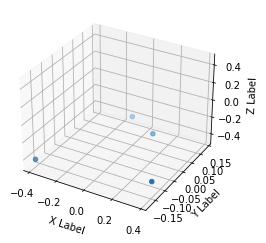

Time diff:  261.0
Footstep timestamp:  1054289.0
Height check index:  584
Height check timestamp:  1054388.0

FL moving: 0.08688799999999997. FR moving: 0.015391999999999961
RL moving: 0.010238000000000025. RR moving: 0.08835199999999999

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.382238. FR later: -0.39763
RR moving: -0.396049. RL moving: -0.309161

Coord FR: [0.377, -0.128, -0.382]. Coord FL: [0.107, 0.082, -0.396]. Coord RR: [-0.387, -0.177, -0.409]. Coord RL: [-0.122, 0.138, -0.407]

FR step_size: 0.5139400000000001. FL step_size: 0. RR step size: 0. RL step_size: 0.5290320000000001.


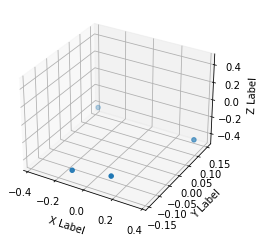

Time diff:  270.0
Footstep timestamp:  1054550.0
Height check index:  714
Height check timestamp:  1054649.0

FL moving: 0.008170999999999984. FR moving: 0.07932499999999998
RL moving: 0.07833299999999999. RR moving: 0.010663000000000034

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.394476. FR later: -0.315151
RR moving: -0.385619. RL moving: -0.39379

Coord FR: [0.127, -0.122, -0.394]. Coord FL: [0.37, 0.117, -0.386]. Coord RR: [-0.112, -0.144, -0.401]. Coord RL: [-0.376, 0.148, -0.417]

FR step_size: 0.50146. FL step_size: 0. RR step size: 0. RL step_size: 0.531167.


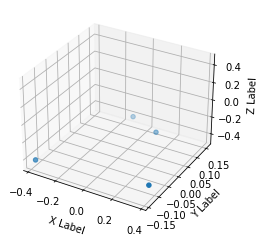

Time diff:  263.0
Footstep timestamp:  1054820.0
Height check index:  849
Height check timestamp:  1054920.0

FL moving: 0.08633200000000002. FR moving: 0.010110000000000008
RL moving: 0.011097999999999997. RR moving: 0.08838499999999999

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.390439. FR later: -0.400549
RR moving: -0.395669. RL moving: -0.309337

Coord FR: [0.375, -0.11, -0.39]. Coord FL: [0.117, 0.112, -0.396]. Coord RR: [-0.379, -0.142, -0.416]. Coord RL: [-0.112, 0.154, -0.405]

FR step_size: 0.513926. FL step_size: 0. RR step size: 0. RL step_size: 0.524212.


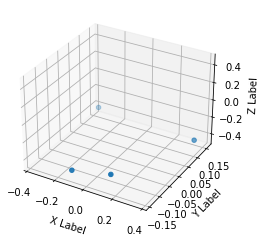

Time diff:  269.0
Footstep timestamp:  1055083.0
Height check index:  980
Height check timestamp:  1055183.0

FL moving: 0.008300999999999947. FR moving: 0.08105899999999999
RL moving: 0.08002499999999996. RR moving: 0.009463999999999972

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.396377. FR later: -0.315318
RR moving: -0.385545. RL moving: -0.393846

Coord FR: [0.118, -0.115, -0.396]. Coord FL: [0.374, 0.122, -0.386]. Coord RR: [-0.11, -0.144, -0.402]. Coord RL: [-0.367, 0.155, -0.415]

FR step_size: 0.511954. FL step_size: 0. RR step size: 0. RL step_size: 0.5239670000000001.


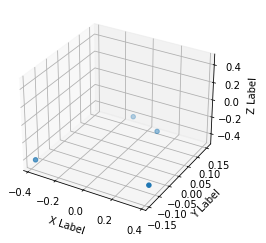

Time diff:  265.0
Footstep timestamp:  1055352.0
Height check index:  1114
Height check timestamp:  1055452.0

FL moving: 0.08504700000000004. FR moving: 0.00904499999999997
RL moving: 0.012191000000000007. RR moving: 0.08656599999999998

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.390222. FR later: -0.399267
RR moving: -0.395606. RL moving: -0.310559

Coord FR: [0.374, -0.112, -0.39]. Coord FL: [0.118, 0.115, -0.396]. Coord RR: [-0.377, -0.144, -0.415]. Coord RL: [-0.11, 0.152, -0.405]

FR step_size: 0.511748. FL step_size: 0. RR step size: 0. RL step_size: 0.5182420000000001.


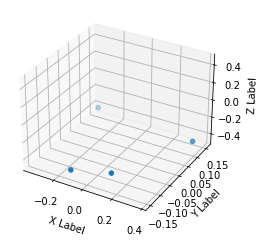

Time diff:  269.0
Footstep timestamp:  1055617.0
Height check index:  1246
Height check timestamp:  1055717.0

FL moving: 0.008282000000000012. FR moving: 0.083231
RL moving: 0.08155400000000002. RR moving: 0.00875999999999999

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.395979. FR later: -0.312748
RR moving: -0.386616. RL moving: -0.394898

Coord FR: [0.117, -0.115, -0.396]. Coord FL: [0.373, 0.115, -0.387]. Coord RR: [-0.111, -0.151, -0.401]. Coord RL: [-0.362, 0.155, -0.417]

FR step_size: 0.5094259999999999. FL step_size: 0. RR step size: 0. RL step_size: 0.511892.


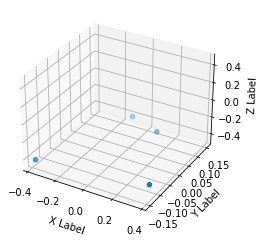

Time diff:  263.0
Footstep timestamp:  1055886.0
Height check index:  1380
Height check timestamp:  1055986.0

FL moving: 0.08719700000000002. FR moving: 0.009612999999999983
RL moving: 0.009718000000000004. RR moving: 0.08935300000000002

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.390724. FR later: -0.400337
RR moving: -0.39654. RL moving: -0.309343

Coord FR: [0.372, -0.115, -0.391]. Coord FL: [0.119, 0.111, -0.397]. Coord RR: [-0.375, -0.15, -0.414]. Coord RL: [-0.114, 0.151, -0.406]

FR step_size: 0.507155. FL step_size: 0. RR step size: 0. RL step_size: 0.517927.


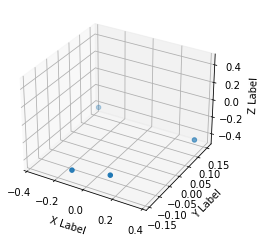

Time diff:  269.0
Footstep timestamp:  1056149.0
Height check index:  1511
Height check timestamp:  1056249.0

FL moving: 0.007131999999999972. FR moving: 0.08126499999999998
RL moving: 0.08095799999999997. RR moving: 0.009861000000000009

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.395957. FR later: -0.314692
RR moving: -0.386931. RL moving: -0.394063

Coord FR: [0.118, -0.118, -0.396]. Coord FL: [0.372, 0.121, -0.387]. Coord RR: [-0.11, -0.143, -0.401]. Coord RL: [-0.367, 0.152, -0.415]

FR step_size: 0.5099940000000001. FL step_size: 0. RR step size: 0. RL step_size: 0.518977.


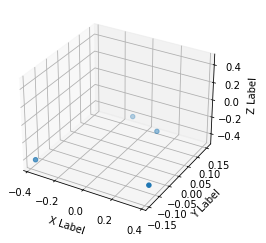

Time diff:  265.0
Footstep timestamp:  1056418.0
Height check index:  1645
Height check timestamp:  1056518.0

FL moving: 0.084872. FR moving: 0.010369000000000017
RL moving: 0.011281000000000041. RR moving: 0.08706599999999998

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.390252. FR later: -0.400621
RR moving: -0.395878. RL moving: -0.311006

Coord FR: [0.374, -0.112, -0.39]. Coord FL: [0.118, 0.115, -0.396]. Coord RR: [-0.373, -0.144, -0.414]. Coord RL: [-0.111, 0.152, -0.405]

FR step_size: 0.511011. FL step_size: 0. RR step size: 0. RL step_size: 0.512495.


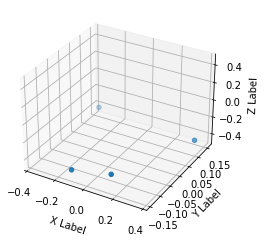

Time diff:  271.0
Footstep timestamp:  1056683.0
Height check index:  1777
Height check timestamp:  1056783.0

FL moving: 0.007682999999999995. FR moving: 0.084316
RL moving: 0.08658100000000002. RR moving: 0.008637000000000006

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.396041. FR later: -0.311725
RR moving: -0.387592. RL moving: -0.395275

Coord FR: [0.117, -0.116, -0.396]. Coord FL: [0.372, 0.12, -0.388]. Coord RR: [-0.114, -0.145, -0.401]. Coord RL: [-0.364, 0.153, -0.415]

FR step_size: 0.513075. FL step_size: 0. RR step size: 0. RL step_size: 0.5158.


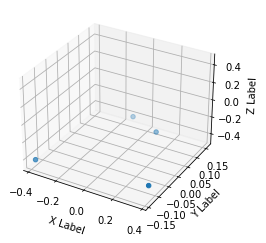

Time diff:  23369.0


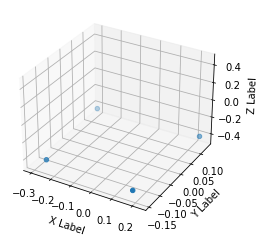

Time diff:  255.0
Footstep timestamp:  1080323.0
Height check index:  2002
Height check timestamp:  1080423.0

FL moving: 0.09534699999999996. FR moving: 0.0006229999999999847
RL moving: 0.0022430000000000505. RR moving: 0.097657

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.409086. FR later: -0.408463
RR moving: -0.411149. RL moving: -0.315802

Coord FR: [0.18, -0.144, -0.409]. Coord FL: [0.225, 0.132, -0.411]. Coord RR: [-0.26, -0.132, -0.413]. Coord RL: [-0.301, 0.128, -0.421]

FR step_size: 0.13171029999999997. FL step_size: 0. RR step size: 0. RL step_size: 0.14938400000000002.


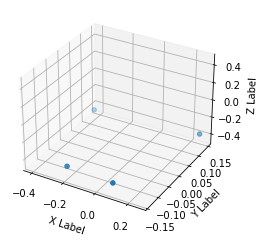

Time diff:  277.0
Footstep timestamp:  1080578.0
Height check index:  2129
Height check timestamp:  1080678.0

FL moving: 0.0005199999999999649. FR moving: 0.074465
RL moving: 0.06989299999999998. RR moving: 0.00404199999999999

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.395662. FR later: -0.321197
RR moving: -0.383086. RL moving: -0.382566

Coord FR: [0.083, -0.137, -0.396]. Coord FL: [0.26, 0.143, -0.383]. Coord RR: [-0.214, -0.129, -0.399]. Coord RL: [-0.405, 0.124, -0.404]

FR step_size: 0.46955359999999996. FL step_size: 0. RR step size: 0. RL step_size: 0.486139.


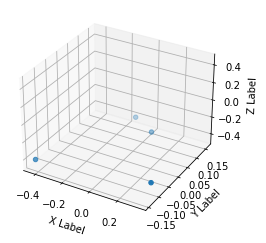

Time diff:  265.0
Footstep timestamp:  1080855.0
Height check index:  2267
Height check timestamp:  1080955.0

FL moving: 0.08277299999999999. FR moving: 0.009553000000000034
RL moving: 0.01376299999999997. RR moving: 0.08638100000000004

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.386217. FR later: -0.39577
RR moving: -0.394754. RL moving: -0.311981

Coord FR: [0.343, -0.099, -0.386]. Coord FL: [0.051, 0.11, -0.395]. Coord RR: [-0.433, -0.142, -0.411]. Coord RL: [-0.138, 0.158, -0.402]

FR step_size: 0.551672. FL step_size: 0. RR step size: 0. RL step_size: 0.5257719999999999.


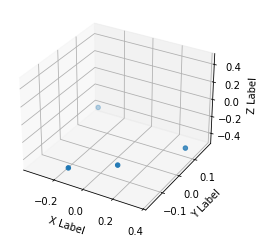

Time diff:  263.0
Footstep timestamp:  1081120.0
Height check index:  2399
Height check timestamp:  1081220.0

FL moving: 0.009944000000000008. FR moving: 0.085868
RL moving: 0.08618399999999998. RR moving: 0.01313000000000003

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.390745. FR later: -0.304877
RR moving: -0.386801. RL moving: -0.396745

Coord FR: [0.104, -0.089, -0.391]. Coord FL: [0.364, 0.087, -0.387]. Coord RR: [-0.132, -0.171, -0.392]. Coord RL: [-0.363, 0.179, -0.421]

FR step_size: 0.506088. FL step_size: 0. RR step size: 0. RL step_size: 0.5036700000000001.


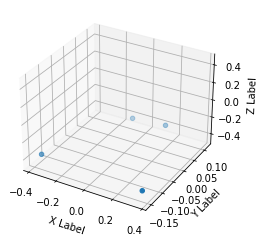

Time diff:  269.0
Footstep timestamp:  1081383.0
Height check index:  2530
Height check timestamp:  1081483.0

FL moving: 0.08068399999999998. FR moving: 0.01500499999999999
RL moving: 0.009184999999999999. RR moving: 0.08020100000000002

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.378954. FR later: -0.393959
RR moving: -0.397155. RL moving: -0.316471

Coord FR: [0.371, -0.154, -0.379]. Coord FL: [0.125, 0.113, -0.397]. Coord RR: [-0.383, -0.13, -0.41]. Coord RL: [-0.11, 0.107, -0.409]

FR step_size: 0.5037. FL step_size: 0. RR step size: 0. RL step_size: 0.5298609999999999.


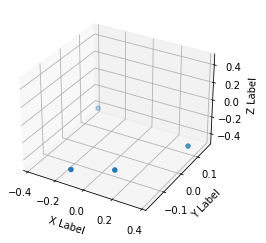

Time diff:  263.0
Footstep timestamp:  1081652.0
Height check index:  2664
Height check timestamp:  1081752.0

FL moving: 0.008608999999999978. FR moving: 0.083455
RL moving: 0.08473400000000003. RR moving: 0.011352000000000029

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.392304. FR later: -0.308849
RR moving: -0.388755. RL moving: -0.397364

Coord FR: [0.114, -0.119, -0.392]. Coord FL: [0.372, 0.086, -0.389]. Coord RR: [-0.12, -0.174, -0.396]. Coord RL: [-0.376, 0.157, -0.424]

FR step_size: 0.5188740000000001. FL step_size: 0. RR step size: 0. RL step_size: 0.53618.


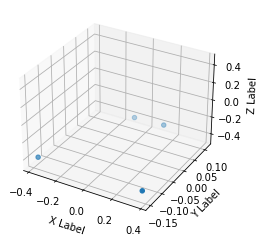

Time diff:  270.0
Footstep timestamp:  1081915.0
Height check index:  2795
Height check timestamp:  1082014.0

FL moving: 0.07875900000000002. FR moving: 0.01516099999999998
RL moving: 0.008701000000000014. RR moving: 0.07690400000000003

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.378771. FR later: -0.393932
RR moving: -0.399359. RL moving: -0.3206

Coord FR: [0.378, -0.151, -0.379]. Coord FL: [0.117, 0.11, -0.399]. Coord RR: [-0.382, -0.141, -0.409]. Coord RL: [-0.102, 0.11, -0.411]

FR step_size: 0.521447. FL step_size: 0. RR step size: 0. RL step_size: 0.53385.


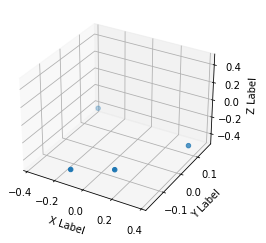

Time diff:  265.0
Footstep timestamp:  1082185.0
Height check index:  2930
Height check timestamp:  1082285.0

FL moving: 0.009593999999999991. FR moving: 0.08357400000000004
RL moving: 0.08577400000000002. RR moving: 0.01082099999999997

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.391956. FR later: -0.308382
RR moving: -0.388725. RL moving: -0.398319

Coord FR: [0.115, -0.116, -0.392]. Coord FL: [0.375, 0.089, -0.389]. Coord RR: [-0.118, -0.172, -0.396]. Coord RL: [-0.372, 0.157, -0.425]

FR step_size: 0.5199530000000001. FL step_size: 0. RR step size: 0. RL step_size: 0.533397.


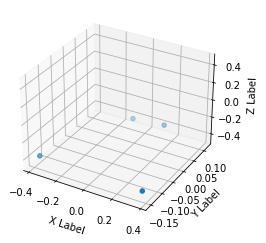

Time diff:  269.0
Footstep timestamp:  1082450.0
Height check index:  3062
Height check timestamp:  1082550.0

FL moving: 0.083868. FR moving: 0.015126000000000028
RL moving: 0.0066649999999999765. RR moving: 0.08541899999999997

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.380959. FR later: -0.396085
RR moving: -0.398961. RL moving: -0.315093

Coord FR: [0.379, -0.153, -0.381]. Coord FL: [0.12, 0.115, -0.399]. Coord RR: [-0.384, -0.136, -0.41]. Coord RL: [-0.105, 0.109, -0.411]

FR step_size: 0.5226230000000001. FL step_size: 0. RR step size: 0. RL step_size: 0.5382990000000001.


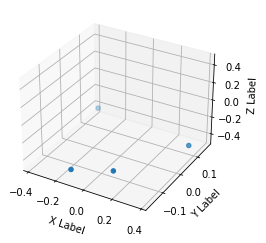

Time diff:  76940.0


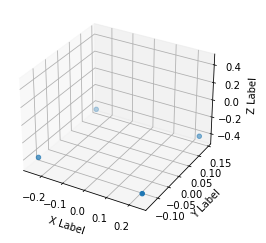

Time diff:  273.0
Footstep timestamp:  1159659.0
Height check index:  3241
Height check timestamp:  1159759.0

FL moving: 0.07753299999999996. FR moving: 0.0004649999999999932
RL moving: 0.0003049999999999997. RR moving: 0.080019

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.410617. FR later: -0.410152
RR moving: -0.409792. RL moving: -0.332259

Coord FR: [0.237, -0.134, -0.411]. Coord FL: [0.236, 0.142, -0.41]. Coord RR: [-0.249, -0.122, -0.415]. Coord RL: [-0.249, 0.133, -0.419]

FR step_size: 0.08079199999999997. FL step_size: 0. RR step size: 0. RL step_size: 0.07232999999999995.


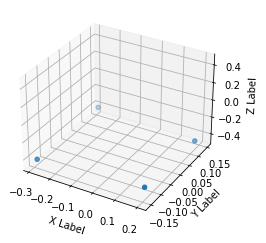

Time diff:  257.0
Footstep timestamp:  1159932.0
Height check index:  3377
Height check timestamp:  1160032.0

FL moving: 0.00027199999999999447. FR moving: 0.09232799999999997
RL moving: 0.08876200000000001. RR moving: 0.0005780000000000229

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.405819. FR later: -0.313491
RR moving: -0.409073. RL moving: -0.409345

Coord FR: [0.19, -0.129, -0.406]. Coord FL: [0.202, 0.121, -0.409]. Coord RR: [-0.281, -0.154, -0.402]. Coord RL: [-0.289, 0.148, -0.414]

FR step_size: 0.18946360000000004. FL step_size: 0. RR step size: 0. RL step_size: 0.22266299999999994.


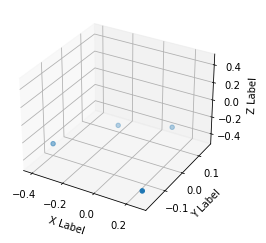

Time diff:  273.0
Footstep timestamp:  1160189.0
Height check index:  3505
Height check timestamp:  1160289.0

FL moving: 0.07428399999999996. FR moving: 0.004107000000000027
RL moving: 0.01067900000000005. RR moving: 0.07032

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.379694. FR later: -0.383801
RR moving: -0.39635. RL moving: -0.322066

Coord FR: [0.269, -0.181, -0.38]. Coord FL: [0.092, 0.15, -0.396]. Coord RR: [-0.407, -0.093, -0.398]. Coord RL: [-0.192, 0.085, -0.402]

FR step_size: 0.48463980000000006. FL step_size: 0. RR step size: 0. RL step_size: 0.507007.


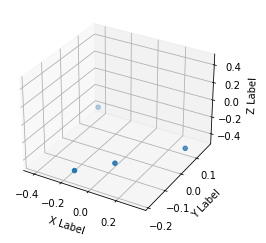

Time diff:  273.0
Footstep timestamp:  1160462.0
Height check index:  3641
Height check timestamp:  1160562.0

FL moving: 0.011975999999999987. FR moving: 0.08293300000000003
RL moving: 0.07836400000000004. RR moving: 0.0064469999999999805

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.393554. FR later: -0.310621
RR moving: -0.381998. RL moving: -0.393974

Coord FR: [0.042, -0.096, -0.394]. Coord FL: [0.35, 0.074, -0.382]. Coord RR: [-0.134, -0.188, -0.395]. Coord RL: [-0.426, 0.169, -0.412]

FR step_size: 0.57924. FL step_size: 0. RR step size: 0. RL step_size: 0.543496.


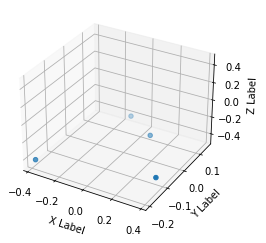

Time diff:  257.0
Footstep timestamp:  1160735.0
Height check index:  3777
Height check timestamp:  1160835.0

FL moving: 0.08871999999999997. FR moving: 0.015215999999999952
RL moving: 0.01142399999999999. RR moving: 0.09032700000000005

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.383159. FR later: -0.398375
RR moving: -0.39601. RL moving: -0.30729

Coord FR: [0.377, -0.121, -0.383]. Coord FL: [0.106, 0.07, -0.396]. Coord RR: [-0.376, -0.197, -0.413]. Coord RL: [-0.125, 0.142, -0.405]

FR step_size: 0.511684. FL step_size: 0. RR step size: 0. RL step_size: 0.524712.


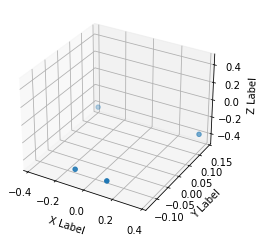

Time diff:  275.0
Footstep timestamp:  1160992.0
Height check index:  3905
Height check timestamp:  1161092.0

FL moving: 0.008374999999999966. FR moving: 0.07813000000000003
RL moving: 0.07306400000000002. RR moving: 0.009736000000000022

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.396336. FR later: -0.318206
RR moving: -0.37984. RL moving: -0.388215

Coord FR: [0.13, -0.129, -0.396]. Coord FL: [0.371, 0.134, -0.38]. Coord RR: [-0.104, -0.122, -0.402]. Coord RL: [-0.378, 0.137, -0.412]

FR step_size: 0.504564. FL step_size: 0. RR step size: 0. RL step_size: 0.536124.


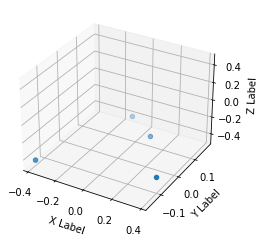

Time diff:  259.0
Footstep timestamp:  1161267.0
Height check index:  4041
Height check timestamp:  1161366.0

FL moving: 0.08565600000000001. FR moving: 0.010733999999999966
RL moving: 0.012438000000000005. RR moving: 0.085957

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.388622. FR later: -0.399356
RR moving: -0.395415. RL moving: -0.309759

Coord FR: [0.376, -0.081, -0.389]. Coord FL: [0.113, 0.097, -0.395]. Coord RR: [-0.378, -0.159, -0.418]. Coord RL: [-0.116, 0.173, -0.405]

FR step_size: 0.5083880000000001. FL step_size: 0. RR step size: 0. RL step_size: 0.516024.


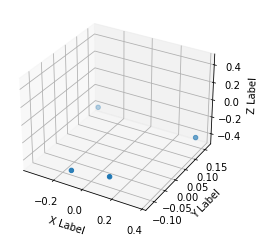

Time diff:  279.0
Footstep timestamp:  1161526.0
Height check index:  4151
Height check timestamp:  1161643.0

FL moving: 0.012079000000000006. FR moving: 0.10502100000000003
RL moving: 0.10028400000000004. RR moving: 0.006414000000000031

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.396612. FR later: -0.291591
RR moving: -0.378445. RL moving: -0.390524

Coord FR: [0.127, -0.1, -0.397]. Coord FL: [0.372, 0.139, -0.378]. Coord RR: [-0.107, -0.118, -0.405]. Coord RL: [-0.361, 0.16, -0.414]

FR step_size: 0.489669. FL step_size: 0. RR step size: 0. RL step_size: 0.5093920000000001.


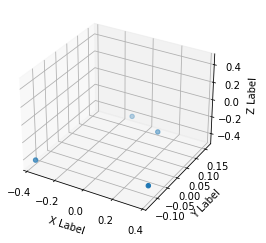

Time diff:  261.0
Footstep timestamp:  1161805.0
Height check index:  4281
Height check timestamp:  1161904.0

FL moving: 0.08767999999999998. FR moving: 0.007883000000000029
RL moving: 0.012907000000000002. RR moving: 0.09023400000000004

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.391659. FR later: -0.399542
RR moving: -0.396045. RL moving: -0.308365

Coord FR: [0.369, -0.105, -0.392]. Coord FL: [0.125, 0.12, -0.396]. Coord RR: [-0.371, -0.134, -0.42]. Coord RL: [-0.116, 0.159, -0.407]

FR step_size: 0.47368299999999997. FL step_size: 0. RR step size: 0. RL step_size: 0.476922.


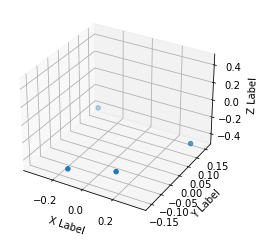

Time diff:  263.0
Footstep timestamp:  1162066.0
Height check index:  4411
Height check timestamp:  1162165.0

FL moving: 0.006280999999999981. FR moving: 0.08205699999999999
RL moving: 0.08200799999999997. RR moving: 0.007030999999999954

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.393435. FR later: -0.311378
RR moving: -0.39027. RL moving: -0.396551

Coord FR: [0.129, -0.109, -0.393]. Coord FL: [0.359, 0.106, -0.39]. Coord RR: [-0.128, -0.157, -0.399]. Coord RL: [-0.35, 0.159, -0.42]

FR step_size: 0.487042. FL step_size: 0. RR step size: 0. RL step_size: 0.493189.


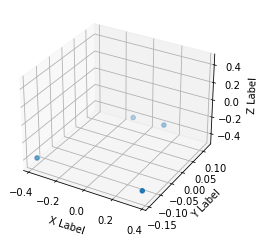

Time diff:  273.0
Footstep timestamp:  1162329.0
Height check index:  4542
Height check timestamp:  1162428.0

FL moving: 0.07844099999999998. FR moving: 0.015219999999999956
RL moving: 0.008960999999999997. RR moving: 0.07441999999999999

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.379406. FR later: -0.394626
RR moving: -0.398814. RL moving: -0.320373

Coord FR: [0.372, -0.145, -0.379]. Coord FL: [0.114, 0.118, -0.399]. Coord RR: [-0.382, -0.139, -0.408]. Coord RL: [-0.111, 0.116, -0.409]

FR step_size: 0.520853. FL step_size: 0. RR step size: 0. RL step_size: 0.5233920000000001.


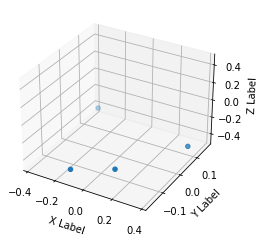

Time diff:  266.0
Footstep timestamp:  1162602.0
Height check index:  4678
Height check timestamp:  1162701.0

FL moving: 0.009845999999999966. FR moving: 0.083953
RL moving: 0.08833999999999997. RR moving: 0.011498000000000008

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.392755. FR later: -0.308802
RR moving: -0.389506. RL moving: -0.399352

Coord FR: [0.111, -0.11, -0.393]. Coord FL: [0.373, 0.089, -0.39]. Coord RR: [-0.122, -0.169, -0.395]. Coord RL: [-0.375, 0.161, -0.423]

FR step_size: 0.519644. FL step_size: 0. RR step size: 0. RL step_size: 0.526716.


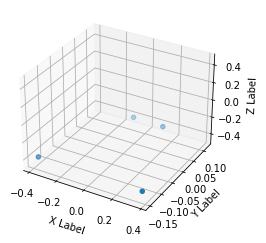

Time diff:  4327.0


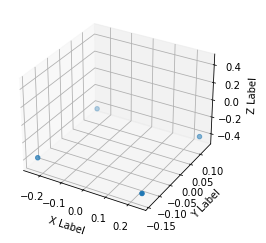

Time diff:  267.0
Footstep timestamp:  1167195.0
Height check index:  4842
Height check timestamp:  1167295.0

FL moving: 0.09489700000000001. FR moving: 0.00122899999999998
RL moving: 0.0024980000000000002. RR moving: 0.097134

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.410493. FR later: -0.411722
RR moving: -0.41377. RL moving: -0.318873

Coord FR: [0.24, -0.142, -0.41]. Coord FL: [0.241, 0.134, -0.414]. Coord RR: [-0.242, -0.133, -0.412]. Coord RL: [-0.241, 0.128, -0.418]

FR step_size: 0.08579299999999998. FL step_size: 0. RR step size: 0. RL step_size: 0.07948500000000003.


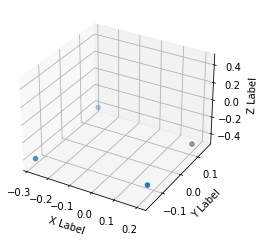

Time diff:  257.0
Footstep timestamp:  1167462.0
Height check index:  4975
Height check timestamp:  1167562.0

FL moving: 0.0007909999999999862. FR moving: 0.09237600000000001
RL moving: 0.08921800000000002. RR moving: 0.00025399999999997647

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.407098. FR later: -0.314722
RR moving: -0.411581. RL moving: -0.41079

Coord FR: [0.193, -0.126, -0.407]. Coord FL: [0.203, 0.109, -0.412]. Coord RR: [-0.281, -0.165, -0.401]. Coord RL: [-0.281, 0.154, -0.415]

FR step_size: 0.18275860000000002. FL step_size: 0. RR step size: 0. RL step_size: 0.204984.


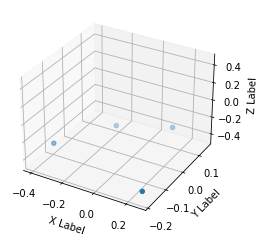

Time diff:  273.0
Footstep timestamp:  1167719.0
Height check index:  5103
Height check timestamp:  1167819.0

FL moving: 0.07489299999999999. FR moving: 0.002715999999999996
RL moving: 0.009109999999999951. RR moving: 0.073654

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.384608. FR later: -0.387324
RR moving: -0.397721. RL moving: -0.322828

Coord FR: [0.269, -0.187, -0.385]. Coord FL: [0.096, 0.149, -0.398]. Coord RR: [-0.401, -0.094, -0.399]. Coord RL: [-0.196, 0.079, -0.402]

FR step_size: 0.475989. FL step_size: 0. RR step size: 0. RL step_size: 0.496575.


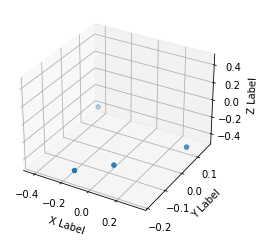

Time diff:  275.0
Footstep timestamp:  1167992.0
Height check index:  5239
Height check timestamp:  1168092.0

FL moving: 0.012135000000000007. FR moving: 0.08314100000000002
RL moving: 0.07974300000000001. RR moving: 0.007813999999999988

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.39505. FR later: -0.311909
RR moving: -0.383721. RL moving: -0.395856

Coord FR: [0.046, -0.106, -0.395]. Coord FL: [0.349, 0.076, -0.384]. Coord RR: [-0.135, -0.185, -0.395]. Coord RL: [-0.427, 0.159, -0.408]

FR step_size: 0.573413. FL step_size: 0. RR step size: 0. RL step_size: 0.5410679999999999.


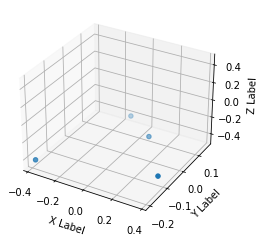

Time diff:  257.0
Footstep timestamp:  1168267.0
Height check index:  5376
Height check timestamp:  1168367.0

FL moving: 0.08873199999999998. FR moving: 0.013178999999999996
RL moving: 0.010451999999999961. RR moving: 0.090424

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.389988. FR later: -0.403167
RR moving: -0.397235. RL moving: -0.308503

Coord FR: [0.373, -0.108, -0.39]. Coord FL: [0.103, 0.07, -0.397]. Coord RR: [-0.376, -0.199, -0.415]. Coord RL: [-0.127, 0.152, -0.404]

FR step_size: 0.5090939999999999. FL step_size: 0. RR step size: 0. RL step_size: 0.518986.


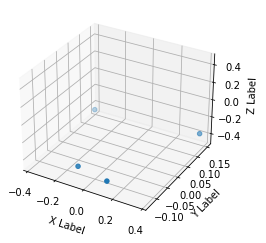

Time diff:  275.0
Footstep timestamp:  1168524.0
Height check index:  5503
Height check timestamp:  1168623.0

FL moving: 0.008643000000000012. FR moving: 0.07752699999999996
RL moving: 0.07137700000000002. RR moving: 0.008002000000000009

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.398956. FR later: -0.321429
RR moving: -0.381189. RL moving: -0.389832

Coord FR: [0.13, -0.13, -0.399]. Coord FL: [0.369, 0.148, -0.381]. Coord RR: [-0.105, -0.109, -0.403]. Coord RL: [-0.375, 0.132, -0.41]

FR step_size: 0.504621. FL step_size: 0. RR step size: 0. RL step_size: 0.530791.


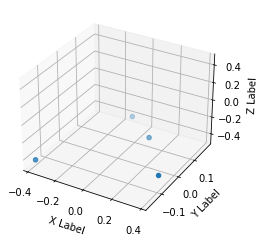

Time diff:  261.0
Footstep timestamp:  1168799.0
Height check index:  5640
Height check timestamp:  1168898.0

FL moving: 0.086254. FR moving: 0.011880000000000002
RL moving: 0.009436. RR moving: 0.08518400000000004

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.3902. FR later: -0.40208
RR moving: -0.398387. RL moving: -0.312133

Coord FR: [0.376, -0.072, -0.39]. Coord FL: [0.111, 0.095, -0.398]. Coord RR: [-0.377, -0.165, -0.415]. Coord RL: [-0.116, 0.18, -0.406]

FR step_size: 0.506167. FL step_size: 0. RR step size: 0. RL step_size: 0.509826.


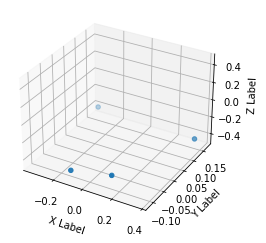

Time diff:  271.0
Footstep timestamp:  1169060.0
Height check index:  5770
Height check timestamp:  1169159.0

FL moving: 0.00954499999999997. FR moving: 0.081428
RL moving: 0.07690000000000002. RR moving: 0.005686000000000024

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.398903. FR later: -0.317475
RR moving: -0.381684. RL moving: -0.391229

Coord FR: [0.13, -0.088, -0.399]. Coord FL: [0.371, 0.142, -0.382]. Coord RR: [-0.11, -0.114, -0.407]. Coord RL: [-0.359, 0.169, -0.411]

FR step_size: 0.493541. FL step_size: 0. RR step size: 0. RL step_size: 0.5137929999999999.


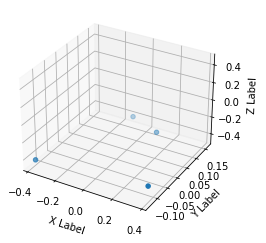

Time diff:  263.0
Footstep timestamp:  1169331.0
Height check index:  5905
Height check timestamp:  1169430.0

FL moving: 0.08367399999999997. FR moving: 0.010122999999999993
RL moving: 0.011695999999999984. RR moving: 0.08524500000000002

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.391703. FR later: -0.401826
RR moving: -0.395746. RL moving: -0.312072

Coord FR: [0.373, -0.106, -0.392]. Coord FL: [0.12, 0.117, -0.396]. Coord RR: [-0.376, -0.134, -0.415]. Coord RL: [-0.111, 0.158, -0.405]

FR step_size: 0.506515. FL step_size: 0. RR step size: 0. RL step_size: 0.517189.


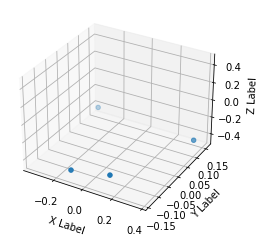

Time diff:  272.0
Footstep timestamp:  1169594.0
Height check index:  6036
Height check timestamp:  1169693.0

FL moving: 0.009660999999999975. FR moving: 0.07906799999999997
RL moving: 0.07852399999999998. RR moving: 0.008638000000000035

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.397167. FR later: -0.318099
RR moving: -0.385913. RL moving: -0.395574

Coord FR: [0.12, -0.115, -0.397]. Coord FL: [0.373, 0.123, -0.386]. Coord RR: [-0.11, -0.141, -0.402]. Coord RL: [-0.362, 0.156, -0.415]

FR step_size: 0.509243. FL step_size: 0. RR step size: 0. RL step_size: 0.513161.


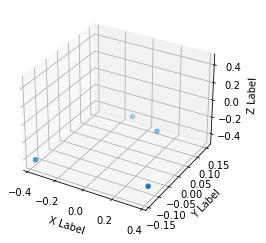

Time diff:  262.0
Footstep timestamp:  1169866.0
Height check index:  6172
Height check timestamp:  1169966.0

FL moving: 0.08830299999999996. FR moving: 0.007643000000000011
RL moving: 0.010832000000000008. RR moving: 0.09024100000000002

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.392854. FR later: -0.400497
RR moving: -0.397342. RL moving: -0.309039

Coord FR: [0.374, -0.114, -0.393]. Coord FL: [0.117, 0.116, -0.397]. Coord RR: [-0.374, -0.142, -0.414]. Coord RL: [-0.113, 0.152, -0.406]

FR step_size: 0.5093700000000001. FL step_size: 0. RR step size: 0. RL step_size: 0.509887.


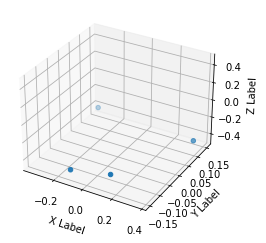

Time diff:  56389.0


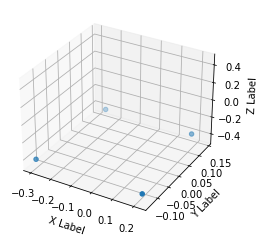

Time diff:  259.0
Footstep timestamp:  1226517.0
Height check index:  6487
Height check timestamp:  1226617.0

FL moving: 0.0010129999999999861. FR moving: 0.096105
RL moving: 0.09212100000000001. RR moving: 0.0018859999999999988

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.413688. FR later: -0.317583
RR moving: -0.406609. RL moving: -0.407622

Coord FR: [0.218, -0.133, -0.414]. Coord FL: [0.18, 0.139, -0.407]. Coord RR: [-0.299, -0.131, -0.413]. Coord RL: [-0.259, 0.14, -0.413]

FR step_size: 0.12843160000000003. FL step_size: 0. RR step size: 0. RL step_size: 0.145632.


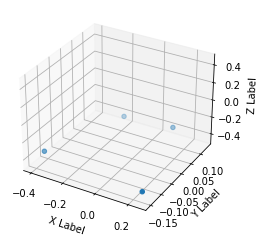

Time diff:  269.0
Footstep timestamp:  1226776.0
Height check index:  6616
Height check timestamp:  1226876.0

FL moving: 0.078984. FR moving: 0.0011059999999999959
RL moving: 0.006433999999999995. RR moving: 0.07734800000000003

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.388669. FR later: -0.389775
RR moving: -0.396272. RL moving: -0.317288

Coord FR: [0.255, -0.152, -0.389]. Coord FL: [0.088, 0.134, -0.396]. Coord RR: [-0.401, -0.114, -0.401]. Coord RL: [-0.215, 0.124, -0.405]

FR step_size: 0.45760979999999996. FL step_size: 0. RR step size: 0. RL step_size: 0.45275699999999997.


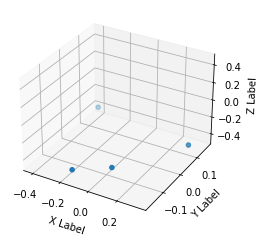

Time diff:  271.0
Footstep timestamp:  1227045.0
Height check index:  6750
Height check timestamp:  1227145.0

FL moving: 0.011670999999999987. FR moving: 0.08011499999999999
RL moving: 0.07869599999999999. RR moving: 0.00947199999999998

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.392207. FR later: -0.312092
RR moving: -0.381218. RL moving: -0.392889

Coord FR: [0.051, -0.109, -0.392]. Coord FL: [0.341, 0.092, -0.381]. Coord RR: [-0.147, -0.171, -0.394]. Coord RL: [-0.414, 0.161, -0.412]

FR step_size: 0.5558540000000001. FL step_size: 0. RR step size: 0. RL step_size: 0.530176.


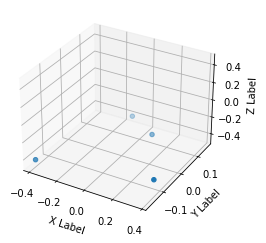

Time diff:  259.0
Footstep timestamp:  1227316.0
Height check index:  6884
Height check timestamp:  1227415.0

FL moving: 0.086698. FR moving: 0.012822
RL moving: 0.01184200000000002. RR moving: 0.08744299999999999

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.385489. FR later: -0.398311
RR moving: -0.393084. RL moving: -0.306386

Coord FR: [0.371, -0.11, -0.385]. Coord FL: [0.105, 0.09, -0.393]. Coord RR: [-0.387, -0.172, -0.414]. Coord RL: [-0.124, 0.154, -0.402]

FR step_size: 0.509096. FL step_size: 0. RR step size: 0. RL step_size: 0.527318.


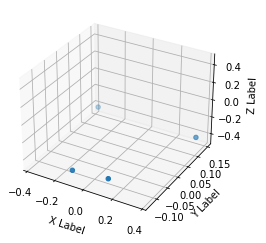

Time diff:  273.0
Footstep timestamp:  1227575.0
Height check index:  7013
Height check timestamp:  1227674.0

FL moving: 0.009191999999999978. FR moving: 0.07916799999999996
RL moving: 0.07414799999999999. RR moving: 0.010467000000000004

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.39574. FR later: -0.316572
RR moving: -0.380969. RL moving: -0.390161

Coord FR: [0.127, -0.12, -0.396]. Coord FL: [0.37, 0.127, -0.381]. Coord RR: [-0.108, -0.129, -0.401]. Coord RL: [-0.372, 0.146, -0.412]

FR step_size: 0.503915. FL step_size: 0. RR step size: 0. RL step_size: 0.521557.


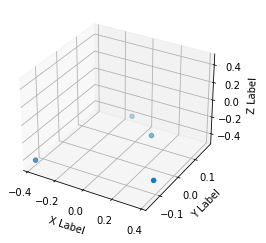

Time diff:  257.0
Footstep timestamp:  1227848.0
Height check index:  7149
Height check timestamp:  1227947.0

FL moving: 0.08509900000000004. FR moving: 0.01046899999999995
RL moving: 0.012894000000000017. RR moving: 0.08821400000000001

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.389898. FR later: -0.400367
RR moving: -0.394284. RL moving: -0.309185

Coord FR: [0.375, -0.091, -0.39]. Coord FL: [0.114, 0.102, -0.394]. Coord RR: [-0.375, -0.151, -0.419]. Coord RL: [-0.117, 0.17, -0.403]

FR step_size: 0.509298. FL step_size: 0. RR step size: 0. RL step_size: 0.515091.


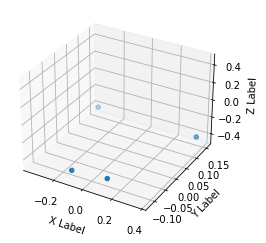

Time diff:  275.0
Footstep timestamp:  1228105.0
Height check index:  7277
Height check timestamp:  1228204.0

FL moving: 0.010348000000000024. FR moving: 0.07691500000000001
RL moving: 0.06981399999999999. RR moving: 0.00832299999999997

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.397798. FR later: -0.320883
RR moving: -0.378832. RL moving: -0.38918

Coord FR: [0.124, -0.11, -0.398]. Coord FL: [0.372, 0.136, -0.379]. Coord RR: [-0.106, -0.119, -0.403]. Coord RL: [-0.363, 0.153, -0.412]

FR step_size: 0.507876. FL step_size: 0. RR step size: 0. RL step_size: 0.519396.


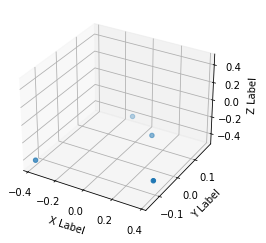

Time diff:  261.0
Footstep timestamp:  1228380.0
Height check index:  7414
Height check timestamp:  1228479.0

FL moving: 0.08504499999999998. FR moving: 0.010347999999999968
RL moving: 0.011228999999999989. RR moving: 0.08794000000000002

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.390259. FR later: -0.400607
RR moving: -0.394756. RL moving: -0.309711

Coord FR: [0.374, -0.09, -0.39]. Coord FL: [0.114, 0.105, -0.395]. Coord RR: [-0.377, -0.148, -0.419]. Coord RL: [-0.115, 0.171, -0.404]

FR step_size: 0.510805. FL step_size: 0. RR step size: 0. RL step_size: 0.516792.


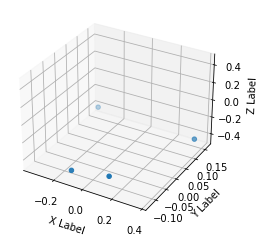

Time diff:  274.0
Footstep timestamp:  1228641.0
Height check index:  7544
Height check timestamp:  1228740.0

FL moving: 0.008678999999999992. FR moving: 0.07942099999999996
RL moving: 0.07579600000000003. RR moving: 0.00703699999999996

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.397551. FR later: -0.31813
RR moving: -0.381798. RL moving: -0.390477

Coord FR: [0.121, -0.106, -0.398]. Coord FL: [0.372, 0.132, -0.382]. Coord RR: [-0.108, -0.126, -0.404]. Coord RL: [-0.363, 0.16, -0.412]

FR step_size: 0.508808. FL step_size: 0. RR step size: 0. RL step_size: 0.5190859999999999.


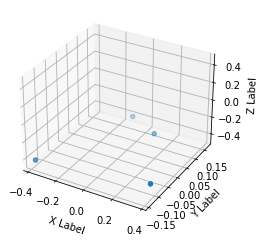

Time diff:  259.0
Footstep timestamp:  1228915.0
Height check index:  7681
Height check timestamp:  1229015.0

FL moving: 0.08846700000000002. FR moving: 0.008703000000000016
RL moving: 0.010776000000000008. RR moving: 0.091115

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.392546. FR later: -0.401249
RR moving: -0.395141. RL moving: -0.306674

Coord FR: [0.373, -0.101, -0.393]. Coord FL: [0.115, 0.111, -0.395]. Coord RR: [-0.38, -0.142, -0.417]. Coord RL: [-0.116, 0.164, -0.404]

FR step_size: 0.5112. FL step_size: 0. RR step size: 0. RL step_size: 0.5195430000000001.


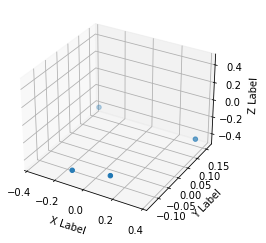

Time diff:  275.0
Footstep timestamp:  1229174.0
Height check index:  7810
Height check timestamp:  1229274.0

FL moving: 0.00991700000000001. FR moving: 0.078152
RL moving: 0.07663599999999998. RR moving: 0.008643999999999985

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.397247. FR later: -0.319095
RR moving: -0.38264. RL moving: -0.392557

Coord FR: [0.12, -0.112, -0.397]. Coord FL: [0.373, 0.13, -0.383]. Coord RR: [-0.109, -0.135, -0.403]. Coord RL: [-0.364, 0.158, -0.413]

FR step_size: 0.510192. FL step_size: 0. RR step size: 0. RL step_size: 0.515836.


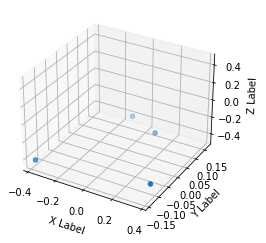

Time diff:  261.0
Footstep timestamp:  1229449.0
Height check index:  7947
Height check timestamp:  1229549.0

FL moving: 0.08998899999999999. FR moving: 0.007840999999999987
RL moving: 0.01113900000000001. RR moving: 0.091144

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.394044. FR later: -0.401885
RR moving: -0.39527. RL moving: -0.305281

Coord FR: [0.373, -0.102, -0.394]. Coord FL: [0.116, 0.115, -0.395]. Coord RR: [-0.377, -0.143, -0.416]. Coord RL: [-0.116, 0.163, -0.403]

FR step_size: 0.511082. FL step_size: 0. RR step size: 0. RL step_size: 0.518108.


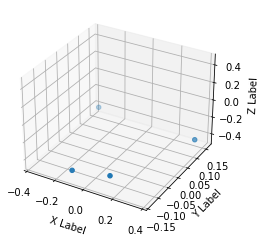

Time diff:  271.0
Footstep timestamp:  1229710.0
Height check index:  8077
Height check timestamp:  1229810.0

FL moving: 0.009583999999999981. FR moving: 0.08202599999999999
RL moving: 0.08154699999999998. RR moving: 0.008562999999999987

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.397831. FR later: -0.315805
RR moving: -0.385762. RL moving: -0.395346

Coord FR: [0.119, -0.113, -0.398]. Coord FL: [0.373, 0.128, -0.386]. Coord RR: [-0.109, -0.136, -0.403]. Coord RL: [-0.366, 0.158, -0.413]

FR step_size: 0.512491. FL step_size: 0. RR step size: 0. RL step_size: 0.516445.


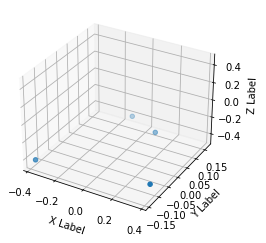

Time diff:  263.0
Footstep timestamp:  1229981.0
Height check index:  8212
Height check timestamp:  1230081.0

FL moving: 0.08629700000000001. FR moving: 0.009543999999999997
RL moving: 0.010951999999999962. RR moving: 0.08886

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.393497. FR later: -0.403041
RR moving: -0.39606. RL moving: -0.309763

Coord FR: [0.374, -0.104, -0.393]. Coord FL: [0.115, 0.117, -0.396]. Coord RR: [-0.374, -0.143, -0.415]. Coord RL: [-0.115, 0.162, -0.403]

FR step_size: 0.5132380000000001. FL step_size: 0. RR step size: 0. RL step_size: 0.515881.


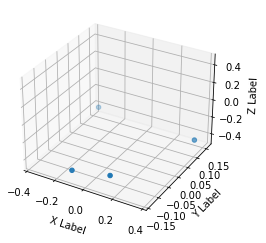

Time diff:  271.0
Footstep timestamp:  1230244.0
Height check index:  8343
Height check timestamp:  1230344.0

FL moving: 0.006935999999999998. FR moving: 0.08316200000000001
RL moving: 0.08318899999999996. RR moving: 0.007570000000000021

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.398125. FR later: -0.314963
RR moving: -0.388137. RL moving: -0.395073

Coord FR: [0.118, -0.114, -0.398]. Coord FL: [0.372, 0.125, -0.388]. Coord RR: [-0.11, -0.138, -0.403]. Coord RL: [-0.367, 0.156, -0.413]

FR step_size: 0.512022. FL step_size: 0. RR step size: 0. RL step_size: 0.517188.


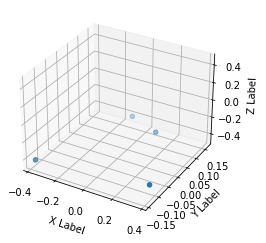

Time diff:  261.0
Footstep timestamp:  1230515.0
Height check index:  8478
Height check timestamp:  1230615.0

FL moving: 0.087976. FR moving: 0.008276999999999979
RL moving: 0.010728000000000015. RR moving: 0.09040199999999998

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.393844. FR later: -0.402121
RR moving: -0.396361. RL moving: -0.308385

Coord FR: [0.373, -0.106, -0.394]. Coord FL: [0.115, 0.117, -0.396]. Coord RR: [-0.376, -0.142, -0.415]. Coord RL: [-0.116, 0.16, -0.404]

FR step_size: 0.511833. FL step_size: 0. RR step size: 0. RL step_size: 0.515166.


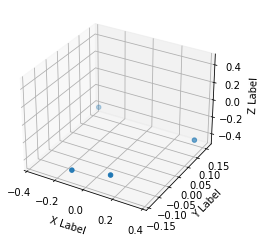

Time diff:  271.0
Footstep timestamp:  1230776.0
Height check index:  8608
Height check timestamp:  1230876.0

FL moving: 0.007838999999999985. FR moving: 0.08124300000000001
RL moving: 0.08006600000000003. RR moving: 0.00811400000000001

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.397314. FR later: -0.316071
RR moving: -0.386817. RL moving: -0.394656

Coord FR: [0.118, -0.114, -0.397]. Coord FL: [0.372, 0.124, -0.387]. Coord RR: [-0.111, -0.14, -0.402]. Coord RL: [-0.366, 0.156, -0.413]

FR step_size: 0.5120979999999999. FL step_size: 0. RR step size: 0. RL step_size: 0.516683.


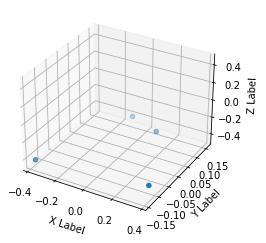

Time diff:  265.0
Footstep timestamp:  1231047.0
Height check index:  8743
Height check timestamp:  1231146.0

FL moving: 0.08552100000000001. FR moving: 0.008493000000000028
RL moving: 0.010270999999999975. RR moving: 0.087756

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.392935. FR later: -0.401428
RR moving: -0.396246. RL moving: -0.310725

Coord FR: [0.373, -0.11, -0.393]. Coord FL: [0.114, 0.116, -0.396]. Coord RR: [-0.375, -0.142, -0.414]. Coord RL: [-0.114, 0.155, -0.404]

FR step_size: 0.517371. FL step_size: 0. RR step size: 0. RL step_size: 0.51056.


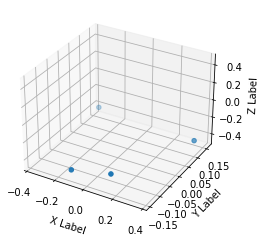

Time diff:  269.0
Footstep timestamp:  1231312.0
Height check index:  8874
Height check timestamp:  1231411.0

FL moving: 0.00789899999999999. FR moving: 0.084679
RL moving: 0.08627400000000002. RR moving: 0.008261999999999992

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.396863. FR later: -0.312184
RR moving: -0.38823. RL moving: -0.396129

Coord FR: [0.114, -0.114, -0.397]. Coord FL: [0.373, 0.121, -0.388]. Coord RR: [-0.115, -0.145, -0.401]. Coord RL: [-0.365, 0.156, -0.414]

FR step_size: 0.514665. FL step_size: 0. RR step size: 0. RL step_size: 0.518187.


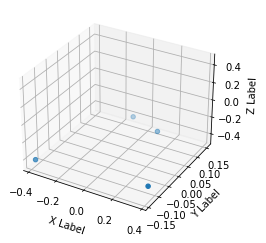

Time diff:  264.0
Footstep timestamp:  1231581.0
Height check index:  9009
Height check timestamp:  1231681.0

FL moving: 0.08825. FR moving: 0.008002999999999982
RL moving: 0.009836999999999985. RR moving: 0.090366

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.393243. FR later: -0.401246
RR moving: -0.397866. RL moving: -0.309616

Coord FR: [0.373, -0.114, -0.393]. Coord FL: [0.117, 0.116, -0.398]. Coord RR: [-0.382, -0.142, -0.413]. Coord RL: [-0.114, 0.152, -0.406]

FR step_size: 0.5097700000000001. FL step_size: 0. RR step size: 0. RL step_size: 0.513564.


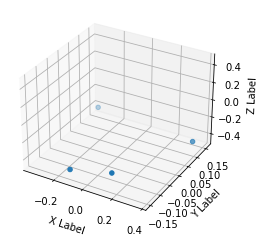

Time diff:  8135.0


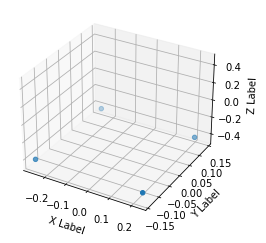

Time diff:  265.0
Footstep timestamp:  1239980.0
Height check index:  9250
Height check timestamp:  1240080.0

FL moving: 0.0005859999999999754. FR moving: 0.09459300000000004
RL moving: 0.09390399999999999. RR moving: 0.0017360000000000153

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.406382. FR later: -0.311789
RR moving: -0.409831. RL moving: -0.410417

Coord FR: [0.227, -0.137, -0.406]. Coord FL: [0.213, 0.13, -0.41]. Coord RR: [-0.266, -0.139, -0.409]. Coord RL: [-0.25, 0.14, -0.419]

FR step_size: 0.07393. FL step_size: 0. RR step size: 0. RL step_size: 0.07914299999999999.


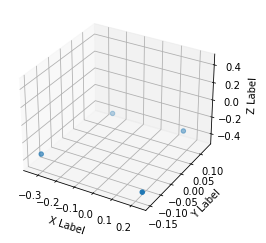

Time diff:  255.0
Footstep timestamp:  1240245.0
Height check index:  9382
Height check timestamp:  1240345.0

FL moving: 0.08977400000000002. FR moving: 0.0012150000000000216
RL moving: 0.000140000000000029. RR moving: 0.08898499999999998

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.394203. FR later: -0.392988
RR moving: -0.401644. RL moving: -0.31187

Coord FR: [0.233, -0.149, -0.394]. Coord FL: [0.145, 0.134, -0.402]. Coord RR: [-0.339, -0.125, -0.403]. Coord RL: [-0.244, 0.125, -0.412]

FR step_size: 0.3440533. FL step_size: 0. RR step size: 0. RL step_size: 0.335854.


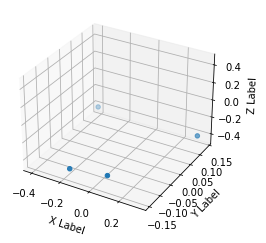

Time diff:  277.0
Footstep timestamp:  1240500.0
Height check index:  9509
Height check timestamp:  1240600.0

FL moving: 0.00866100000000003. FR moving: 0.07092399999999999
RL moving: 0.06869700000000001. RR moving: 0.009841000000000044

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.387491. FR later: -0.316567
RR moving: -0.377604. RL moving: -0.386265

Coord FR: [0.067, -0.129, -0.387]. Coord FL: [0.323, 0.125, -0.378]. Coord RR: [-0.164, -0.146, -0.391]. Coord RL: [-0.405, 0.137, -0.409]

FR step_size: 0.5451904000000001. FL step_size: 0. RR step size: 0. RL step_size: 0.537652.


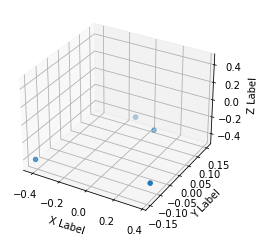

Time diff:  267.0
Footstep timestamp:  1240777.0
Height check index:  9647
Height check timestamp:  1240877.0

FL moving: 0.08144300000000004. FR moving: 0.013388999999999984
RL moving: 0.016773000000000038. RR moving: 0.08433800000000002

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.382621. FR later: -0.39601
RR moving: -0.392892. RL moving: -0.311449

Coord FR: [0.368, -0.111, -0.383]. Coord FL: [0.079, 0.114, -0.393]. Coord RR: [-0.413, -0.15, -0.412]. Coord RL: [-0.117, 0.152, -0.403]

FR step_size: 0.5444469999999999. FL step_size: 0. RR step size: 0. RL step_size: 0.5378000000000001.


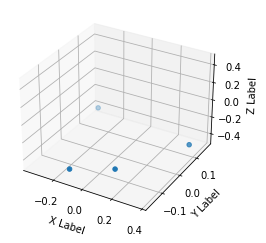

Time diff:  267.0
Footstep timestamp:  1241044.0
Height check index:  9780
Height check timestamp:  1241144.0

FL moving: 0.010097000000000023. FR moving: 0.08597199999999999
RL moving: 0.084621. RR moving: 0.009900999999999993

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.3923. FR later: -0.306328
RR moving: -0.386768. RL moving: -0.396865

Coord FR: [0.116, -0.107, -0.392]. Coord FL: [0.372, 0.1, -0.387]. Coord RR: [-0.119, -0.166, -0.396]. Coord RL: [-0.36, 0.164, -0.421]

FR step_size: 0.5061640000000001. FL step_size: 0. RR step size: 0. RL step_size: 0.510602.


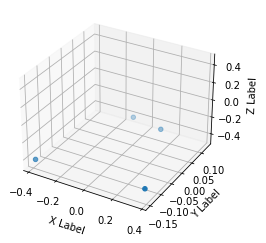

Time diff:  263.0
Footstep timestamp:  1241311.0
Height check index:  9912
Height check timestamp:  1241410.0

FL moving: 0.08566000000000001. FR moving: 0.011741000000000001
RL moving: 0.008572999999999997. RR moving: 0.08565899999999999

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.385735. FR later: -0.397476
RR moving: -0.398928. RL moving: -0.313268

Coord FR: [0.372, -0.138, -0.386]. Coord FL: [0.122, 0.107, -0.399]. Coord RR: [-0.382, -0.15, -0.41]. Coord RL: [-0.113, 0.128, -0.411]

FR step_size: 0.505277. FL step_size: 0. RR step size: 0. RL step_size: 0.525002.


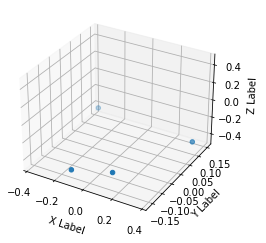

Time diff:  269.0
Footstep timestamp:  1241574.0
Height check index:  10043
Height check timestamp:  1241673.0

FL moving: 0.009473999999999982. FR moving: 0.079876
RL moving: 0.08134599999999997. RR moving: 0.00978399999999996

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.3932. FR later: -0.313324
RR moving: -0.388151. RL moving: -0.397625

Coord FR: [0.118, -0.122, -0.393]. Coord FL: [0.373, 0.106, -0.388]. Coord RR: [-0.113, -0.161, -0.398]. Coord RL: [-0.369, 0.149, -0.421]

FR step_size: 0.515914. FL step_size: 0. RR step size: 0. RL step_size: 0.527948.


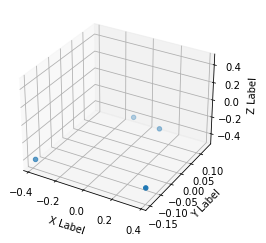

Time diff:  267.0
Footstep timestamp:  1241843.0
Height check index:  10177
Height check timestamp:  1241942.0

FL moving: 0.08340999999999998. FR moving: 0.010729999999999962
RL moving: 0.010490999999999973. RR moving: 0.08349400000000001

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.386263. FR later: -0.396993
RR moving: -0.398922. RL moving: -0.315512

Coord FR: [0.376, -0.133, -0.386]. Coord FL: [0.115, 0.112, -0.399]. Coord RR: [-0.38, -0.149, -0.41]. Coord RL: [-0.108, 0.133, -0.411]

FR step_size: 0.516248. FL step_size: 0. RR step size: 0. RL step_size: 0.521522.


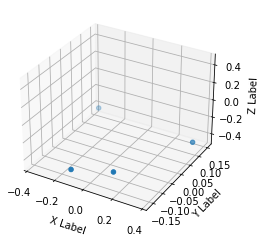

Time diff:  267.0
Footstep timestamp:  1242110.0
Height check index:  10310
Height check timestamp:  1242209.0

FL moving: 0.006449999999999956. FR moving: 0.08387899999999998
RL moving: 0.086287. RR moving: 0.009631999999999974

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.393376. FR later: -0.309497
RR moving: -0.390614. RL moving: -0.397064

Coord FR: [0.119, -0.12, -0.393]. Coord FL: [0.374, 0.106, -0.391]. Coord RR: [-0.116, -0.162, -0.397]. Coord RL: [-0.366, 0.15, -0.422]

FR step_size: 0.513439. FL step_size: 0. RR step size: 0. RL step_size: 0.518971.


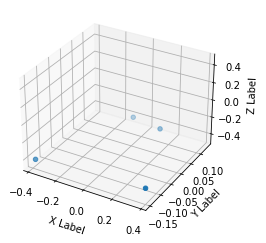

Time diff:  7576.0


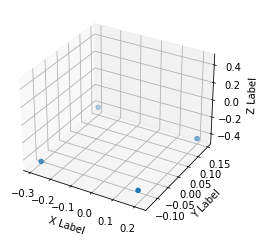

Time diff:  255.0
Footstep timestamp:  1249953.0
Height check index:  10629
Height check timestamp:  1250053.0

FL moving: 0.095825. FR moving: 0.00029800000000002047
RL moving: 0.0023480000000000167. RR moving: 0.095532

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.412214. FR later: -0.411916
RR moving: -0.407676. RL moving: -0.311851

Coord FR: [0.188, -0.126, -0.412]. Coord FL: [0.214, 0.133, -0.408]. Coord RR: [-0.268, -0.133, -0.413]. Coord RL: [-0.296, 0.146, -0.414]

FR step_size: 0.1513162. FL step_size: 0. RR step size: 0. RL step_size: 0.17534700000000003.


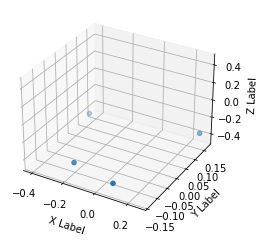

Time diff:  279.0
Footstep timestamp:  1250208.0
Height check index:  10756
Height check timestamp:  1250308.0

FL moving: 0.004595999999999989. FR moving: 0.07599
RL moving: 0.06635000000000002. RR moving: 0.0038599999999999746

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.400168. FR later: -0.324178
RR moving: -0.375402. RL moving: -0.379998

Coord FR: [0.085, -0.135, -0.4]. Coord FL: [0.262, 0.166, -0.375]. Coord RR: [-0.202, -0.103, -0.401]. Coord RL: [-0.406, 0.121, -0.399]

FR step_size: 0.47942890000000005. FL step_size: 0. RR step size: 0. RL step_size: 0.502486.


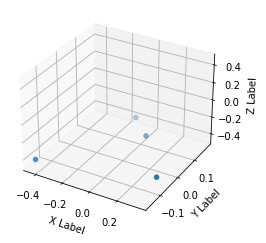

Time diff:  261.0
Footstep timestamp:  1250487.0
Height check index:  10895
Height check timestamp:  1250587.0

FL moving: 0.08571100000000004. FR moving: 0.009815000000000018
RL moving: 0.010338999999999987. RR moving: 0.08693899999999999

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.386362. FR later: -0.396177
RR moving: -0.396172. RL moving: -0.310461

Coord FR: [0.345, -0.077, -0.386]. Coord FL: [0.043, 0.098, -0.396]. Coord RR: [-0.437, -0.155, -0.41]. Coord RL: [-0.138, 0.177, -0.404]

FR step_size: 0.551967. FL step_size: 0. RR step size: 0. RL step_size: 0.5255639999999999.


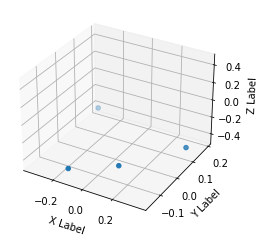

Time diff:  263.0
Footstep timestamp:  1250748.0
Height check index:  11025
Height check timestamp:  1250848.0

FL moving: 0.010978000000000043. FR moving: 0.082988
RL moving: 0.08325300000000002. RR moving: 0.012195000000000011

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.390608. FR later: -0.30762
RR moving: -0.383331. RL moving: -0.394309

Coord FR: [0.113, -0.076, -0.391]. Coord FL: [0.363, 0.103, -0.383]. Coord RR: [-0.127, -0.159, -0.394]. Coord RL: [-0.354, 0.191, -0.421]

FR step_size: 0.49252399999999996. FL step_size: 0. RR step size: 0. RL step_size: 0.496953.


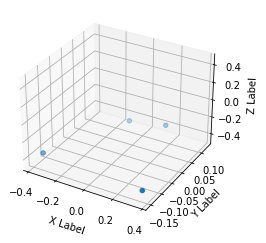

Time diff:  271.0
Footstep timestamp:  1251011.0
Height check index:  11156
Height check timestamp:  1251111.0

FL moving: 0.07981500000000002. FR moving: 0.01516400000000001
RL moving: 0.00825300000000001. RR moving: 0.07799199999999995

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.376896. FR later: -0.39206
RR moving: -0.396009. RL moving: -0.316194

Coord FR: [0.37, -0.153, -0.377]. Coord FL: [0.127, 0.129, -0.396]. Coord RR: [-0.38, -0.121, -0.41]. Coord RL: [-0.11, 0.108, -0.409]

FR step_size: 0.5018739999999999. FL step_size: 0. RR step size: 0. RL step_size: 0.5267850000000001.


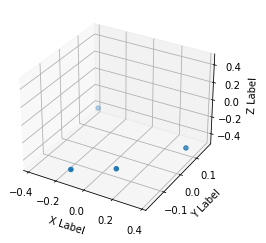

Time diff:  263.0
Footstep timestamp:  1251282.0
Height check index:  11291
Height check timestamp:  1251382.0

FL moving: 0.010394999999999988. FR moving: 0.083814
RL moving: 0.08498699999999998. RR moving: 0.01086100000000001

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.392514. FR later: -0.3087
RR moving: -0.386761. RL moving: -0.397156

Coord FR: [0.112, -0.112, -0.393]. Coord FL: [0.371, 0.08, -0.387]. Coord RR: [-0.124, -0.177, -0.396]. Coord RL: [-0.381, 0.167, -0.424]

FR step_size: 0.516458. FL step_size: 0. RR step size: 0. RL step_size: 0.538864.


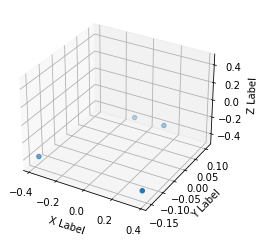

Time diff:  269.0
Footstep timestamp:  1251545.0
Height check index:  11422
Height check timestamp:  1251645.0

FL moving: 0.080897. FR moving: 0.015205999999999997
RL moving: 0.009226000000000012. RR moving: 0.076849

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.378186. FR later: -0.393392
RR moving: -0.398356. RL moving: -0.317459

Coord FR: [0.378, -0.155, -0.378]. Coord FL: [0.12, 0.104, -0.398]. Coord RR: [-0.385, -0.142, -0.409]. Coord RL: [-0.103, 0.106, -0.41]

FR step_size: 0.5139940000000001. FL step_size: 0. RR step size: 0. RL step_size: 0.5400990000000001.


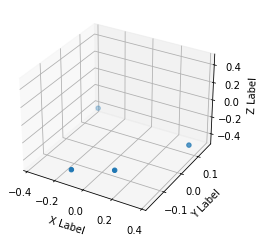

Time diff:  267.0
Footstep timestamp:  1251814.0
Height check index:  11556
Height check timestamp:  1251915.0

FL moving: 0.009505000000000041. FR moving: 0.08505299999999999
RL moving: 0.083623. RR moving: 0.009570000000000023

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.391468. FR later: -0.306415
RR moving: -0.387806. RL moving: -0.397311

Coord FR: [0.117, -0.121, -0.391]. Coord FL: [0.373, 0.089, -0.388]. Coord RR: [-0.114, -0.174, -0.396]. Coord RL: [-0.372, 0.154, -0.424]

FR step_size: 0.51993. FL step_size: 0. RR step size: 0. RL step_size: 0.529253.


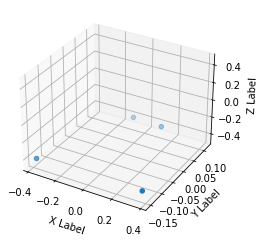

Time diff:  267.0
Footstep timestamp:  1252081.0
Height check index:  11688
Height check timestamp:  1252180.0

FL moving: 0.08445800000000003. FR moving: 0.015822999999999976
RL moving: 0.006309999999999982. RR moving: 0.08390999999999998

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.379691. FR later: -0.395514
RR moving: -0.39943. RL moving: -0.314972

Coord FR: [0.379, -0.152, -0.38]. Coord FL: [0.115, 0.106, -0.399]. Coord RR: [-0.378, -0.148, -0.409]. Coord RL: [-0.107, 0.115, -0.412]

FR step_size: 0.5241690000000001. FL step_size: 0. RR step size: 0. RL step_size: 0.532748.


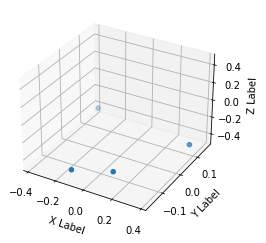

Time diff:  265.0
Footstep timestamp:  1252348.0
Height check index:  11821
Height check timestamp:  1252447.0

FL moving: 0.009599999999999997. FR moving: 0.081372
RL moving: 0.08420299999999997. RR moving: 0.010077000000000003

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.393409. FR later: -0.312037
RR moving: -0.388818. RL moving: -0.398418

Coord FR: [0.116, -0.121, -0.393]. Coord FL: [0.376, 0.096, -0.389]. Coord RR: [-0.117, -0.166, -0.397]. Coord RL: [-0.379, 0.157, -0.423]

FR step_size: 0.5187470000000001. FL step_size: 0. RR step size: 0. RL step_size: 0.5410889999999999.


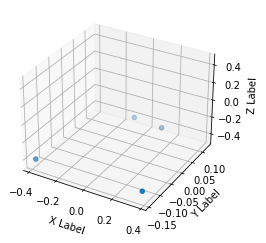

Time diff:  269.0
Footstep timestamp:  1252613.0
Height check index:  11953
Height check timestamp:  1252712.0

FL moving: 0.08225199999999999. FR moving: 0.01528400000000002
RL moving: 0.005732000000000015. RR moving: 0.081042

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.382739. FR later: -0.398023
RR moving: -0.400516. RL moving: -0.318264

Coord FR: [0.378, -0.144, -0.383]. Coord FL: [0.12, 0.109, -0.401]. Coord RR: [-0.384, -0.143, -0.408]. Coord RL: [-0.105, 0.122, -0.411]

FR step_size: 0.512687. FL step_size: 0. RR step size: 0. RL step_size: 0.5303450000000001.


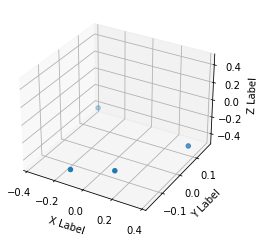

Time diff:  265.0
Footstep timestamp:  1252882.0
Height check index:  12087
Height check timestamp:  1252981.0

FL moving: 0.009070999999999996. FR moving: 0.08272299999999999
RL moving: 0.08458100000000002. RR moving: 0.008983999999999992

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.395596. FR later: -0.312873
RR moving: -0.391369. RL moving: -0.40044

Coord FR: [0.118, -0.113, -0.396]. Coord FL: [0.372, 0.094, -0.391]. Coord RR: [-0.12, -0.166, -0.398]. Coord RL: [-0.371, 0.163, -0.421]

FR step_size: 0.509971. FL step_size: 0. RR step size: 0. RL step_size: 0.525874.


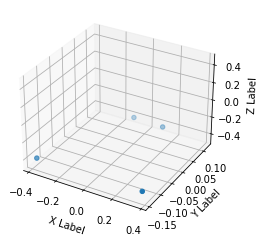

Time diff:  270.0
Footstep timestamp:  1253147.0
Height check index:  12219
Height check timestamp:  1253246.0

FL moving: 0.082486. FR moving: 0.012905999999999973
RL moving: 0.007705999999999991. RR moving: 0.07981899999999997

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.38546. FR later: -0.398366
RR moving: -0.401164. RL moving: -0.318678

Coord FR: [0.376, -0.146, -0.385]. Coord FL: [0.12, 0.109, -0.401]. Coord RR: [-0.382, -0.141, -0.407]. Coord RL: [-0.107, 0.117, -0.412]

FR step_size: 0.509912. FL step_size: 0. RR step size: 0. RL step_size: 0.521943.


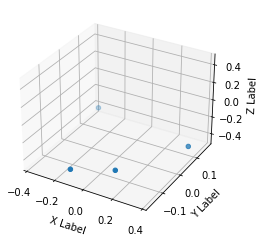

Time diff:  263.0
Footstep timestamp:  1253417.0
Height check index:  12354
Height check timestamp:  1253517.0

FL moving: 0.008450000000000013. FR moving: 0.087669
RL moving: 0.08670700000000003. RR moving: 0.009010999999999991

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.395975. FR later: -0.308306
RR moving: -0.393521. RL moving: -0.401971

Coord FR: [0.117, -0.112, -0.396]. Coord FL: [0.371, 0.092, -0.394]. Coord RR: [-0.121, -0.167, -0.397]. Coord RL: [-0.368, 0.163, -0.421]

FR step_size: 0.507196. FL step_size: 0. RR step size: 0. RL step_size: 0.51925.


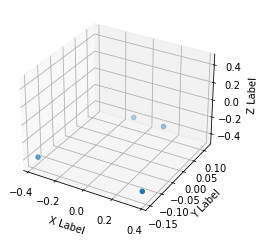

Time diff:  269.0
Footstep timestamp:  1253680.0
Height check index:  12485
Height check timestamp:  1253780.0

FL moving: 0.083432. FR moving: 0.012546000000000002
RL moving: 0.007678999999999991. RR moving: 0.08071600000000001

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.384967. FR later: -0.397513
RR moving: -0.401543. RL moving: -0.318111

Coord FR: [0.375, -0.15, -0.385]. Coord FL: [0.122, 0.109, -0.402]. Coord RR: [-0.379, -0.14, -0.408]. Coord RL: [-0.107, 0.114, -0.412]

FR step_size: 0.508785. FL step_size: 0. RR step size: 0. RL step_size: 0.520133.


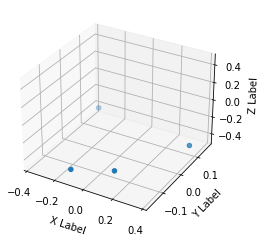

Time diff:  265.0
Footstep timestamp:  1253949.0
Height check index:  12619
Height check timestamp:  1254049.0

FL moving: 0.00820700000000002. FR moving: 0.08588000000000001
RL moving: 0.08544000000000002. RR moving: 0.008954000000000018

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.395117. FR later: -0.309237
RR moving: -0.392215. RL moving: -0.400422

Coord FR: [0.116, -0.116, -0.395]. Coord FL: [0.372, 0.093, -0.392]. Coord RR: [-0.118, -0.166, -0.397]. Coord RL: [-0.366, 0.158, -0.421]

FR step_size: 0.511326. FL step_size: 0. RR step size: 0. RL step_size: 0.5205519999999999.


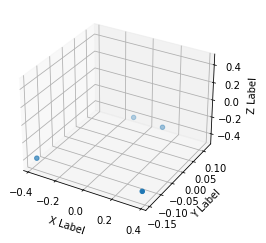

Time diff:  269.0
Footstep timestamp:  1254214.0
Height check index:  12751
Height check timestamp:  1254314.0

FL moving: 0.08488300000000004. FR moving: 0.013475000000000015
RL moving: 0.007612999999999981. RR moving: 0.08291500000000002

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.385133. FR later: -0.398608
RR moving: -0.40177. RL moving: -0.316887

Coord FR: [0.377, -0.147, -0.385]. Coord FL: [0.122, 0.108, -0.402]. Coord RR: [-0.379, -0.142, -0.408]. Coord RL: [-0.107, 0.117, -0.412]

FR step_size: 0.507816. FL step_size: 0. RR step size: 0. RL step_size: 0.515548.


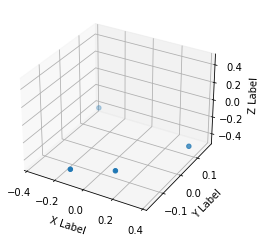

Time diff:  263.0
Footstep timestamp:  1254483.0
Height check index:  12885
Height check timestamp:  1254583.0

FL moving: 0.007769999999999999. FR moving: 0.085754
RL moving: 0.08684000000000003. RR moving: 0.008489999999999998

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.396504. FR later: -0.31075
RR moving: -0.393281. RL moving: -0.401051

Coord FR: [0.119, -0.113, -0.397]. Coord FL: [0.372, 0.093, -0.393]. Coord RR: [-0.122, -0.166, -0.398]. Coord RL: [-0.365, 0.163, -0.421]

FR step_size: 0.502394. FL step_size: 0. RR step size: 0. RL step_size: 0.515246.


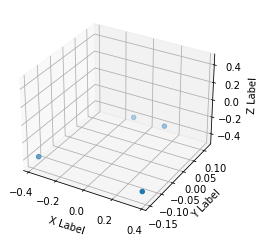

Time diff:  269.0
Footstep timestamp:  1254746.0
Height check index:  13016
Height check timestamp:  1254846.0

FL moving: 0.08395200000000003. FR moving: 0.013295000000000001
RL moving: 0.007671000000000039. RR moving: 0.08268999999999999

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.386715. FR later: -0.40001
RR moving: -0.400963. RL moving: -0.317011

Coord FR: [0.374, -0.149, -0.387]. Coord FL: [0.124, 0.111, -0.401]. Coord RR: [-0.381, -0.137, -0.408]. Coord RL: [-0.109, 0.114, -0.411]

FR step_size: 0.505447. FL step_size: 0. RR step size: 0. RL step_size: 0.521717.


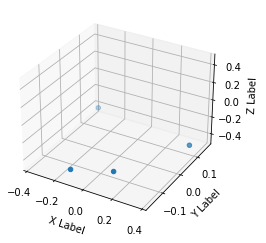

Time diff:  265.0
Footstep timestamp:  1255015.0
Height check index:  13150
Height check timestamp:  1255115.0

FL moving: 0.007280999999999982. FR moving: 0.08572000000000002
RL moving: 0.085364. RR moving: 0.008519999999999972

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.396372. FR later: -0.310652
RR moving: -0.393612. RL moving: -0.400893

Coord FR: [0.116, -0.119, -0.396]. Coord FL: [0.372, 0.095, -0.394]. Coord RR: [-0.119, -0.166, -0.397]. Coord RL: [-0.369, 0.157, -0.42]

FR step_size: 0.511412. FL step_size: 0. RR step size: 0. RL step_size: 0.521848.


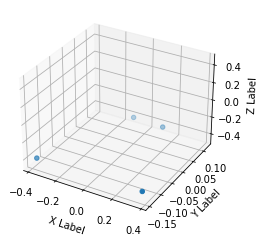

Time diff:  269.0
Footstep timestamp:  1255280.0
Height check index:  13282
Height check timestamp:  1255380.0

FL moving: 0.084976. FR moving: 0.01405099999999998
RL moving: 0.00777899999999998. RR moving: 0.081339

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.386336. FR later: -0.400387
RR moving: -0.402255. RL moving: -0.317279

Coord FR: [0.376, -0.147, -0.386]. Coord FL: [0.121, 0.109, -0.402]. Coord RR: [-0.38, -0.142, -0.407]. Coord RL: [-0.108, 0.117, -0.412]

FR step_size: 0.507425. FL step_size: 0. RR step size: 0. RL step_size: 0.5172140000000001.


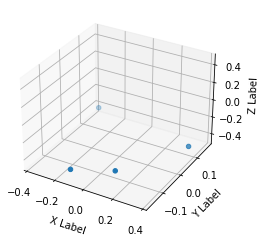

Time diff:  263.0
Footstep timestamp:  1255549.0
Height check index:  13416
Height check timestamp:  1255649.0

FL moving: 0.007224000000000008. FR moving: 0.085677
RL moving: 0.08568399999999998. RR moving: 0.007892999999999983

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.397603. FR later: -0.311926
RR moving: -0.394209. RL moving: -0.401433

Coord FR: [0.118, -0.114, -0.398]. Coord FL: [0.371, 0.092, -0.394]. Coord RR: [-0.121, -0.167, -0.399]. Coord RL: [-0.366, 0.163, -0.42]

FR step_size: 0.5012559999999999. FL step_size: 0. RR step size: 0. RL step_size: 0.510548.


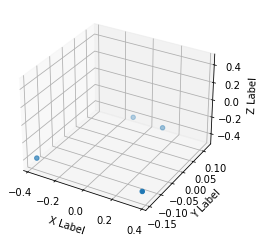

Time diff:  271.0
Footstep timestamp:  1255812.0
Height check index:  13547
Height check timestamp:  1255912.0

FL moving: 0.08511199999999997. FR moving: 0.014023000000000008
RL moving: 0.006309000000000009. RR moving: 0.08019100000000001

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.386482. FR later: -0.400505
RR moving: -0.401537. RL moving: -0.316425

Coord FR: [0.373, -0.147, -0.386]. Coord FL: [0.124, 0.106, -0.402]. Coord RR: [-0.376, -0.142, -0.407]. Coord RL: [-0.11, 0.117, -0.412]

FR step_size: 0.500912. FL step_size: 0. RR step size: 0. RL step_size: 0.509958.


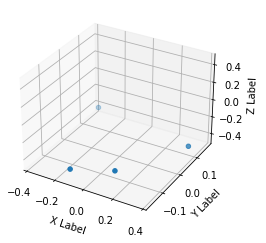

Time diff:  263.0
Footstep timestamp:  1256083.0
Height check index:  13681
Height check timestamp:  1256182.0

FL moving: 0.00674600000000003. FR moving: 0.08601700000000001
RL moving: 0.08788499999999999. RR moving: 0.008066000000000018

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.397505. FR later: -0.311488
RR moving: -0.394721. RL moving: -0.401467

Coord FR: [0.116, -0.114, -0.398]. Coord FL: [0.368, 0.092, -0.395]. Coord RR: [-0.124, -0.166, -0.398]. Coord RL: [-0.368, 0.162, -0.419]

FR step_size: 0.503794. FL step_size: 0. RR step size: 0. RL step_size: 0.5103409999999999.


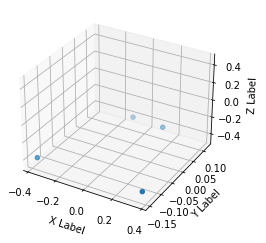

Time diff:  271.0
Footstep timestamp:  1256346.0
Height check index:  13812
Height check timestamp:  1256445.0

FL moving: 0.083183. FR moving: 0.013274000000000008
RL moving: 0.006272. RR moving: 0.08304700000000004

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.387787. FR later: -0.401061
RR moving: -0.401196. RL moving: -0.318013

Coord FR: [0.374, -0.148, -0.388]. Coord FL: [0.122, 0.108, -0.401]. Coord RR: [-0.378, -0.141, -0.407]. Coord RL: [-0.112, 0.117, -0.411]

FR step_size: 0.50698. FL step_size: 0. RR step size: 0. RL step_size: 0.518258.


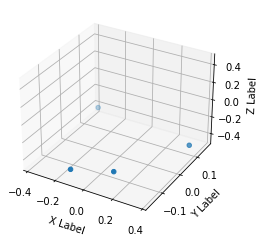

Time diff:  263.0
Footstep timestamp:  1256617.0
Height check index:  13947
Height check timestamp:  1256716.0

FL moving: 0.004718. FR moving: 0.08693499999999998
RL moving: 0.08963900000000002. RR moving: 0.00922400000000001

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.397673. FR later: -0.310738
RR moving: -0.396158. RL moving: -0.400876

Coord FR: [0.114, -0.118, -0.398]. Coord FL: [0.369, 0.096, -0.396]. Coord RR: [-0.123, -0.165, -0.397]. Coord RL: [-0.375, 0.158, -0.419]

FR step_size: 0.507367. FL step_size: 0. RR step size: 0. RL step_size: 0.518418.


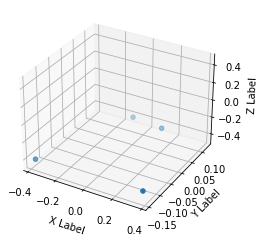

Time diff:  269.0
Footstep timestamp:  1256880.0
Height check index:  14078
Height check timestamp:  1256979.0

FL moving: 0.08477499999999999. FR moving: 0.011956000000000022
RL moving: 0.006649999999999989. RR moving: 0.08370500000000003

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.389312. FR later: -0.401268
RR moving: -0.401876. RL moving: -0.317101

Coord FR: [0.374, -0.141, -0.389]. Coord FL: [0.122, 0.109, -0.402]. Coord RR: [-0.377, -0.144, -0.407]. Coord RL: [-0.111, 0.123, -0.411]

FR step_size: 0.5027950000000001. FL step_size: 0. RR step size: 0. RL step_size: 0.516113.


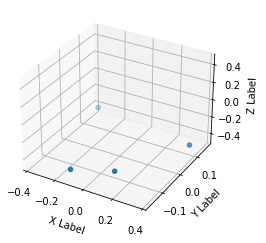

Time diff:  7869.0


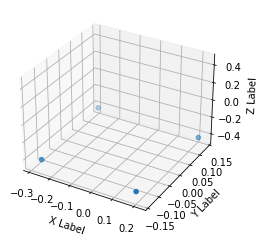

Time diff:  255.0
Footstep timestamp:  1265018.0
Height check index:  14348
Height check timestamp:  1265118.0

FL moving: 0.09426300000000004. FR moving: 0.00016300000000002424
RL moving: 0.0016740000000000088. RR moving: 0.09472399999999997

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.410165. FR later: -0.410002
RR moving: -0.41082. RL moving: -0.316557

Coord FR: [0.189, -0.139, -0.41]. Coord FL: [0.217, 0.131, -0.411]. Coord RR: [-0.269, -0.132, -0.413]. Coord RL: [-0.291, 0.137, -0.419]

FR step_size: 0.15782609999999997. FL step_size: 0. RR step size: 0. RL step_size: 0.18046900000000005.


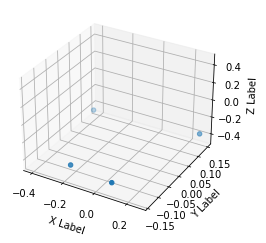

Time diff:  281.0
Footstep timestamp:  1265273.0
Height check index:  14475
Height check timestamp:  1265373.0

FL moving: 0.0011559999999999904. FR moving: 0.07535199999999997
RL moving: 0.06387999999999999. RR moving: 0.003827999999999998

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.3968. FR later: -0.321448
RR moving: -0.38109. RL moving: -0.382246

Coord FR: [0.081, -0.138, -0.397]. Coord FL: [0.267, 0.146, -0.381]. Coord RR: [-0.203, -0.121, -0.399]. Coord RL: [-0.406, 0.124, -0.401]

FR step_size: 0.4850801. FL step_size: 0. RR step size: 0. RL step_size: 0.503098.


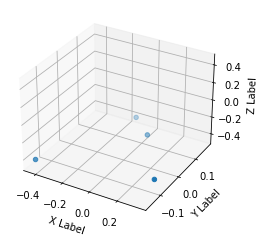

Time diff:  261.0
Footstep timestamp:  1265554.0
Height check index:  14615
Height check timestamp:  1265654.0

FL moving: 0.08546399999999998. FR moving: 0.010352000000000028
RL moving: 0.011682999999999999. RR moving: 0.086762

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.387379. FR later: -0.397731
RR moving: -0.395713. RL moving: -0.310249

Coord FR: [0.344, -0.09, -0.387]. Coord FL: [0.044, 0.098, -0.396]. Coord RR: [-0.436, -0.154, -0.411]. Coord RL: [-0.136, 0.168, -0.403]

FR step_size: 0.559078. FL step_size: 0. RR step size: 0. RL step_size: 0.534238.


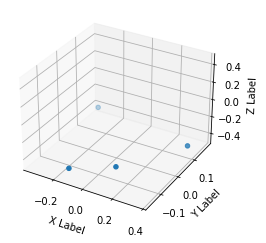

Time diff:  265.0
Footstep timestamp:  1265815.0
Height check index:  14745
Height check timestamp:  1265915.0

FL moving: 0.010610999999999982. FR moving: 0.082735
RL moving: 0.08120700000000003. RR moving: 0.012019000000000002

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.391401. FR later: -0.308666
RR moving: -0.384813. RL moving: -0.395424

Coord FR: [0.107, -0.09, -0.391]. Coord FL: [0.366, 0.103, -0.385]. Coord RR: [-0.124, -0.16, -0.394]. Coord RL: [-0.358, 0.179, -0.419]

FR step_size: 0.505748. FL step_size: 0. RR step size: 0. RL step_size: 0.503791.


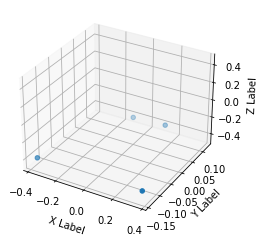

Time diff:  269.0
Footstep timestamp:  1266080.0
Height check index:  14876
Height check timestamp:  1266179.0

FL moving: 0.07965. FR moving: 0.012171000000000043
RL moving: 0.01055600000000001. RR moving: 0.07827600000000001

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.380916. FR later: -0.393087
RR moving: -0.396224. RL moving: -0.316574

Coord FR: [0.371, -0.142, -0.381]. Coord FL: [0.124, 0.12, -0.396]. Coord RR: [-0.379, -0.135, -0.41]. Coord RL: [-0.109, 0.118, -0.408]

FR step_size: 0.507169. FL step_size: 0. RR step size: 0. RL step_size: 0.5230710000000001.


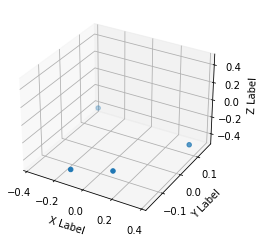

Time diff:  31727.0


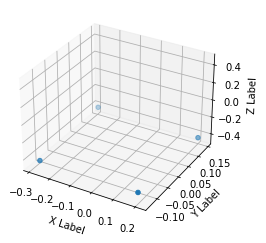

Time diff:  253.0
Footstep timestamp:  1298076.0
Height check index:  15156
Height check timestamp:  1298176.0

FL moving: 0.09582200000000002. FR moving: 0.0008949999999999791
RL moving: 0.0025590000000000335. RR moving: 0.09568600000000005

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.412981. FR later: -0.412086
RR moving: -0.408078. RL moving: -0.312256

Coord FR: [0.192, -0.131, -0.413]. Coord FL: [0.211, 0.136, -0.408]. Coord RR: [-0.271, -0.129, -0.414]. Coord RL: [-0.29, 0.144, -0.413]

FR step_size: 0.16871400000000003. FL step_size: 0. RR step size: 0. RL step_size: 0.18846200000000002.


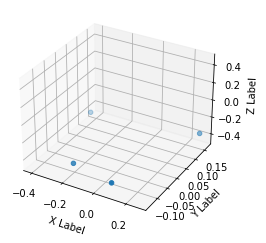

Time diff:  283.0
Footstep timestamp:  1298329.0
Height check index:  15282
Height check timestamp:  1298429.0

FL moving: 0.00422100000000003. FR moving: 0.073052
RL moving: 0.059930999999999957. RR moving: 0.004135

FL moving: False. FR moving: True
RL moving: False. RR moving: False

FR before: -0.400468. FR later: -0.327416
RR moving: -0.376405. RL moving: -0.380626


AssertionError: 

In [41]:
def visualize_absolute_foostep_sizes(dataset, footsteps):    
    # Visualize footsteps
    for idx, footstep in enumerate(footsteps):
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')

        #ax.set_xlim([-0.5, 0.5])
        #ax.set_ylim([-0.3, 0.3])
        ax.set_zlim([-0.5, 0.5])

        dataset[footstep, 32:44] = np.round(dataset[footstep, 32:44], 3)
                    
        # 3D positions
        xs = np.array([dataset[footstep, 32], dataset[footstep, 35], dataset[footstep, 38], dataset[footstep, 41]])
        ys = np.array([dataset[footstep, 33], dataset[footstep, 36], dataset[footstep, 39], dataset[footstep, 42]])
        zs = np.array([dataset[footstep, 34], dataset[footstep, 37], dataset[footstep, 40], dataset[footstep, 43]])    

        ax.scatter(xs, ys, zs, marker='o')

        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')

        plt.show()
        
        if idx < (len(footsteps) - 1):
            time_diff = abs(dataset[footsteps[idx], 0] - dataset[footsteps[idx+1], 0])
        
            print("Time diff: ", time_diff)

            if time_diff < 300:
                
                # Find closest timestamp with gap of 100 (to know which foot is moving)
                absolute_val_array = np.abs(motion_07_cmds[:, 0] - (motion_07_cmds[footstep, 0] + 100))
                idx_height_check = absolute_val_array.argmin()
                
                fr_moving = np.abs(motion_07_cmds[footstep, 34] - motion_07_cmds[idx_height_check, 34])
                fl_moving = np.abs(motion_07_cmds[footstep, 37] - motion_07_cmds[idx_height_check, 37])
                rr_moving = np.abs(motion_07_cmds[footstep, 40] - motion_07_cmds[idx_height_check, 40])
                rl_moving = np.abs(motion_07_cmds[footstep, 43] - motion_07_cmds[idx_height_check, 43])
                
                print("Footstep timestamp: ", motion_07_cmds[footstep, 0])
                print("Height check index: ", idx_height_check)
                print("Height check timestamp: ", motion_07_cmds[idx_height_check, 0])

                print(f'\nFL moving: {fl_moving}. FR moving: {fr_moving}')
                print(f'RL moving: {rl_moving}. RR moving: {rr_moving}')

                print(f'\nFL moving: {fl_moving > 0.06}. FR moving: {fr_moving > 0.06}')
                print(f'RL moving: {rl_moving > 0.06}. RR moving: {rr_moving > 0.06}')
                
                print(f'\nFR before: {motion_07_cmds[footstep, 34]}. FR later: {motion_07_cmds[idx_height_check, 34]}')
                print(f'RR moving: {motion_07_cmds[footstep, 37]}. RL moving: {motion_07_cmds[idx_height_check, 37]}')

                assert (fr_moving > 0.06) == (rl_moving > 0.06)
                assert (rr_moving > 0.06) == (fl_moving > 0.06)
                assert (fr_moving > 0.06) != (fl_moving > 0.06)
                
                # Compute front feet movements
                fr_movement = abs(abs(dataset[footstep, 32]) - abs(dataset[footsteps[idx+1], 32]))
                fl_movement = abs(abs(dataset[footstep, 35]) - abs(dataset[footsteps[idx+1], 35]))
                rr_movement = abs(abs(dataset[footstep, 38]) - abs(dataset[footsteps[idx+1], 38]))
                rl_movement = abs(abs(dataset[footstep, 41]) - abs(dataset[footsteps[idx+1], 41]))
                
                print(f'\nCoord FR: {[xs[0], ys[0], zs[0]]}. Coord FL: {[xs[1], ys[1], zs[1]]}. Coord RR: {[xs[2], ys[2], zs[2]]}. Coord RL: {[xs[3], ys[3], zs[3]]}')
                
                if fr_moving:
                    print(f'\nFR step_size: {fr_movement + fl_movement}. FL step_size: {0}. RR step size: {0}. RL step_size: {rl_movement + rr_movement}.')
                elif fl_moving:
                    print(f'\nFR step_size: {0}. FL step_size: {fl_movement + fr_movement}. RR step size: {rl_movement + rr_movement}. RL step_size: {0}.')
                else:
                    print("\nERROR")

cmds = get_specific_cmd(motion_07, velocity, 0, 0)
motion_07_cmds = motion_07[cmds]
visualize_absolute_foostep_sizes(motion_07_fwd, footsteps_07_fwd)

### Forward motion

In [ ]:
visualize_static_foosteps(motion_07_fwd, footsteps_07_fwd)

In [ ]:
anim = visualize_animated_footsteps(motion_07_fwd, footsteps_07_fwd, "bo")
HTML(anim.to_html5_video())

### Backward motion

In [ ]:
anim = visualize_animated_footsteps(motion_07_bwd, footsteps_07_bwd, "bo")
HTML(anim.to_html5_video())

### Side motion (right)

In [ ]:
anim = visualize_animated_footsteps(motion_07_side_right, footsteps_07_side_right, "bo")
HTML(anim.to_html5_video())

### Side motion (left)

In [ ]:
anim = visualize_animated_footsteps(motion_07_side_left, footsteps_07_side_left, "bo")
HTML(anim.to_html5_video())

### Rotation (clockwise)

In [ ]:
anim = visualize_animated_footsteps(motion_07_clock, footsteps_07_clock, "bo")
HTML(anim.to_html5_video())

### Rotation (counter clockwise)

In [ ]:
anim = visualize_animated_footsteps(motion_07_count, footsteps_07_count, "bo")
HTML(anim.to_html5_video())

# Multivariate Linear Regression (FR foot prediction)

The input will use initially only:

- **HighCmd: fwd, side, rot speeds**
- **HighState: fwd, side, rot speeds, footPosition2Body (FR)**

and as output we seek to predict the following:

- **footPosition2Body (FR)**

In [42]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [43]:
def plot_target_and_predictions(title: str, predictions, target):
    fig, ax1 = plt.subplots(1,1, figsize=(15,10))
    fig.suptitle(title)
    
    # FR plot (height)
    ax1.plot(range(predictions.shape[0]), predictions, 'b-')
    ax1.set_ylabel('Predictions')
    ax1.set_xlabel('Time')
         
    # FR plot (force)
    ax2 = ax1.twinx()
    ax2.plot(range(predictions.shape[0]), target, 'g-')
    ax2.set_ylabel('Target', color='g')

    for tl in ax2.get_yticklabels():
        tl.set_color('g')
    
    fig.tight_layout()
    plt.show()

In [44]:
def create_timestamp_consistent_dataset(dataset, footsteps):
    # Footsteps sizes
    inputs = []
    labels = []
        
    # Compute step sizes
    for idx, footstep in enumerate(footsteps):
        if idx > 0:
            time_diff = dataset[footsteps[idx], 0] - dataset[footsteps[idx-1], 0]
            
            if time_diff < 300:
                inputs.append(dataset[footsteps[idx-1], 2:5].tolist() + dataset[footsteps[idx-1], 25:28].tolist() + dataset[footsteps[idx-1], 32:44].tolist())
                labels.append(dataset[footsteps[idx], 32:44])
            else:
                continue
                    
    # Convert to numpy array
    inputs_numpy = np.array(inputs)
    labels_numpy = np.array(labels)
    
    return inputs_numpy, labels_numpy

X_motion_07_fwd_3D, Y_motion_07_fwd_3D = create_timestamp_consistent_dataset(motion_07_fwd, footsteps_07_fwd)
X_motion_07_bwd_3D, Y_motion_07_bwd_3D = create_timestamp_consistent_dataset(motion_07_bwd, footsteps_07_bwd)
X_motion_07_clock_3D, Y_motion_07_clock_3D = create_timestamp_consistent_dataset(motion_07_clock, footsteps_07_clock)
X_motion_07_count_3D, Y_motion_07_count_3D = create_timestamp_consistent_dataset(motion_07_count, footsteps_07_count)
X_motion_07_side_left_3D, Y_motion_07_side_left_3D = create_timestamp_consistent_dataset(motion_07_side_left, footsteps_07_side_left)
X_motion_07_side_right_3D, Y_motion_07_side_right_3D = create_timestamp_consistent_dataset(motion_07_side_right, footsteps_07_side_right)

# Stack datasets
X_motion_07_3D = np.concatenate((X_motion_07_fwd_3D, X_motion_07_bwd_3D, X_motion_07_side_right_3D, X_motion_07_side_left_3D, X_motion_07_clock_3D, X_motion_07_count_3D))
Y_motion_07_3D = np.concatenate((Y_motion_07_fwd_3D, Y_motion_07_bwd_3D, Y_motion_07_side_right_3D, Y_motion_07_side_left_3D, Y_motion_07_clock_3D, Y_motion_07_count_3D))

In [48]:
%store X_motion_07_3D
%store Y_motion_07_3D

Stored 'X_motion_07_3D' (ndarray)
Stored 'Y_motion_07_3D' (ndarray)


In [45]:
def create_timestamp_consistent_dataset_with_step_size_labels(dataset, footsteps, threshold=0.04):
    # Footsteps sizes
    inputs = []
    labels = []
            
    # Compute step sizes
    for idx, footstep in enumerate(footsteps):
        if idx < (len(footsteps) - 1):
            time_diff = abs(dataset[footsteps[idx], 0] - dataset[footsteps[idx+1], 0])
            
            if time_diff < 300:
                # Input (command, state, x/y/z position for each foot)
                #inputs.append(dataset[footsteps[idx-1], 2:5].tolist() + dataset[footsteps[idx-1], 25:28].tolist() + dataset[footsteps[idx-1], 32:44].tolist())
                
                # Find closest timestamp with gap of 100 (to know which foot is moving)
                absolute_val_array = np.abs(dataset[:, 0] - (dataset[footstep, 0] + 100))
                idx_height_check = absolute_val_array.argmin()
                
                fr_moving = np.abs(dataset[footstep, 34] - dataset[idx_height_check, 34]) > threshold
                fl_moving = np.abs(dataset[footstep, 37] - dataset[idx_height_check, 37]) > threshold
                rr_moving = np.abs(dataset[footstep, 40] - dataset[idx_height_check, 40]) > threshold
                rl_moving = np.abs(dataset[footstep, 43] - dataset[idx_height_check, 43]) > threshold

                assert fr_moving == rl_moving
                assert rr_moving == fl_moving
                assert fr_moving != fl_moving
                
                # Compute FR movement
                fr_movement_x = abs(abs(dataset[footstep, 32]) - abs(dataset[footsteps[idx+1], 32]))
                fr_movement_y = abs(abs(dataset[footstep, 33]) - abs(dataset[footsteps[idx+1], 33]))
                
                # Compute FL movement
                fl_movement_x = abs(abs(dataset[footstep, 35]) - abs(dataset[footsteps[idx+1], 35]))
                fl_movement_y = abs(abs(dataset[footstep, 36]) - abs(dataset[footsteps[idx+1], 36]))
                
                # Compute RR movement
                rr_movement_x = abs(abs(dataset[footstep, 38]) - abs(dataset[footsteps[idx+1], 38]))
                rr_movement_y = abs(abs(dataset[footstep, 39]) - abs(dataset[footsteps[idx+1], 39]))
                
                # Compute RL movement
                rl_movement_x = abs(abs(dataset[footstep, 41]) - abs(dataset[footsteps[idx+1], 41]))
                rl_movement_y = abs(abs(dataset[footstep, 42]) - abs(dataset[footsteps[idx+1], 42]))
                
                label = []
                                
                if fr_moving:
                    label.append([fr_movement_x + fl_movement_x, fr_movement_y + fl_movement_y, 0, 0, 0, 0, rr_movement_x + rl_movement_x, rr_movement_y + rl_movement_y])
                elif fl_moving:
                    label.append([0, 0, fr_movement_x + fl_movement_x, fr_movement_y + fl_movement_y, rr_movement_x + rl_movement_x, rr_movement_y + rl_movement_y, 0, 0])
                else:
                    print("\nERROR")
                    
                labels.append(label)
                inputs.append(dataset[footsteps[idx-1], 2:5].tolist() + dataset[footsteps[idx-1], 25:28].tolist() + [int(fr_moving), int(fl_moving), int(rr_moving), int(rl_moving)])
                
            else:
                continue
                    
    # Convert to numpy array
    inputs_numpy = np.array(inputs)
    labels_numpy = np.array(labels)
    
    return inputs_numpy, labels_numpy.reshape(labels_numpy.shape[0], labels_numpy.shape[2])

X_motion_07_fwd_step, Y_motion_07_fwd_step = create_timestamp_consistent_dataset_with_step_size_labels(motion_07_fwd, footsteps_07_fwd)
X_motion_07_bwd_step, Y_motion_07_bwd_step = create_timestamp_consistent_dataset_with_step_size_labels(motion_07_bwd, footsteps_07_bwd)
X_motion_07_clock_step, Y_motion_07_clock_step = create_timestamp_consistent_dataset_with_step_size_labels(motion_07_clock, footsteps_07_clock)
X_motion_07_count_step, Y_motion_07_count_step = create_timestamp_consistent_dataset_with_step_size_labels(motion_07_count, footsteps_07_count)
X_motion_07_side_left_step, Y_motion_07_side_left_step = create_timestamp_consistent_dataset_with_step_size_labels(motion_07_side_left, footsteps_07_side_left)
X_motion_07_side_right_step, Y_motion_07_side_right_step = create_timestamp_consistent_dataset_with_step_size_labels(motion_07_side_right, footsteps_07_side_right)

# Stack datasets
X_motion_07_step = np.concatenate((X_motion_07_fwd_step, X_motion_07_bwd_step, X_motion_07_side_right_step, X_motion_07_side_left_step, X_motion_07_clock_step, X_motion_07_count_step))
Y_motion_07_step = np.concatenate((Y_motion_07_fwd_step, Y_motion_07_bwd_step, Y_motion_07_side_right_step, Y_motion_07_side_left_step, Y_motion_07_clock_step, Y_motion_07_count_step))

In [46]:
%store X_motion_07_step
%store Y_motion_07_step

Stored 'X_motion_07_step' (ndarray)
Stored 'Y_motion_07_step' (ndarray)


In [47]:
def labels_stats(dataset, title):
    print(f'Statistics for {title} motion\n')
    
    # Find all positive movements in x and y for FR
    fr_steps_x = np.where(dataset[:, 0] > 0)[0]
    fr_steps_y = np.where(dataset[:, 1] > 0)[0]
    
    # Find all positive movements in x and y for FR
    fl_steps_x = np.where(dataset[:, 2] > 0)[0]
    fl_steps_y = np.where(dataset[:, 3] > 0)[0]
    
    # Find all positive movements in x and y for FR
    rr_steps_x = np.where(dataset[:, 4] > 0)[0]
    rr_steps_y = np.where(dataset[:, 5] > 0)[0]
    
    # Find all positive movements in x and y for FR
    rl_steps_x = np.where(dataset[:, 6] > 0)[0]
    rl_steps_y = np.where(dataset[:, 7] > 0)[0]
    
    # Compute stats for FR foot
    print(f'FR mean x step: {np.mean(dataset[fr_steps_x, 0])}. FR std x step: {np.std(dataset[fr_steps_x, 0])}. FR mean y step: {np.mean(dataset[fr_steps_y, 1])}. FR std y step: {np.mean(dataset[fr_steps_y, 1])}')
 
    # Compute stats for FL foot
    print(f'FL mean x step: {np.mean(dataset[fl_steps_x, 2])}. FL std x step: {np.std(dataset[fl_steps_x, 2])}. FL mean y step: {np.mean(dataset[fl_steps_y, 3])}. FL std y step: {np.mean(dataset[fl_steps_y, 3])}')
    
    # Compute stats for RR foot
    print(f'RR mean x step: {np.mean(dataset[rr_steps_x, 4])}. RR std x step: {np.std(dataset[rr_steps_x, 4])}. RR mean y step: {np.mean(dataset[rr_steps_y, 5])}. RR std y step: {np.mean(dataset[rr_steps_y, 5])}')
    
    # Compute stats for RL foot
    print(f'RL mean x step: {np.mean(dataset[rl_steps_x, 6])}. RL std x step: {np.std(dataset[rl_steps_x, 6])}. RL mean y step: {np.mean(dataset[rl_steps_y, 7])}. RL std y step: {np.mean(dataset[rl_steps_y, 7])}\n')
    
labels_stats(Y_motion_07_fwd_step, "forward")
labels_stats(Y_motion_07_bwd_step, "backward")
labels_stats(Y_motion_07_clock_step, "clockwise")
labels_stats(Y_motion_07_count_step, "counter clockwise")
labels_stats(Y_motion_07_side_left_step, "left step")
labels_stats(Y_motion_07_side_right_step, "right step")

Statistics for forward motion

FR mean x step: 0.4811922016949153. FR std x step: 0.10281520469340091. FR mean y step: 0.045000855932203376. FR std y step: 0.045000855932203376
FL mean x step: 0.4652259190476191. FL std x step: 0.12474233065678093. FL mean y step: 0.04267968225806452. FL std y step: 0.04267968225806452
RR mean x step: 0.4727835873015874. RR std x step: 0.12411935953592194. RR mean y step: 0.052104301587301595. RR std y step: 0.052104301587301595
RL mean x step: 0.49027881355932207. RL std x step: 0.09814126051776637. RL mean y step: 0.054014457627118644. RL std y step: 0.054014457627118644

Statistics for backward motion

FR mean x step: 0.209226. FR std x step: 0.04371521655945445. FR mean y step: 0.03572392. FR std y step: 0.03572392
FL mean x step: 0.20944565999999998. FL std x step: 0.043635311989997275. FL mean y step: 0.036141959999999994. FL std y step: 0.036141959999999994
RR mean x step: 0.21352381999999998. RR std x step: 0.044585327628128966. RR mean y step: